# Analysis on data aquired

<p>In this notebook we analyze the data parsed from all sources founded in order to explain how during this COVID-19 epidemic the countries around the world have performed test to found infects.<br>
</p>

# Target Questions

Identify clusters that can distinguish between countries according to how they dealt with the pandemic, trying to find a correlation if countries that have adopted similar policies have achieved the same results.

Then, with the helps of the first clustering, try to estimate the contagion curve.

# Data acquisition and preparation

In [1]:
%cd data
%run italy_data.ipynb
%run usa_data.ipynb
%run uk_data.ipynb
%run brazil_data.ipynb
%run south_korea_data.ipynb
%run indonesia_data.ipynb
%run india_data.ipynb
%run world_population.ipynb

/Users/andre/Desktop/University/Masters/Second year/Second semester/Data Science for business/Lezioni/4° Lezione - 1° Lab/datasciencebusiness/data


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [2]:
#pd.set_option('display.max_rows', 500)

# Data used
We imported data from different country and grouped togheter having the same columns name and arranged by date with the same structure.

Those are database that we used to collect data from:

## Italy (national and regional)
### Updated: 25/04/2020
Source : https://github.com/pcm-dpc/COVID-19 

## USA:
### Updated: 01/05/2020
Source : https://github.com/COVID19Tracking/covid-tracking-data 

## UK:
### Updated: 03/05/2020
Source : https://github.com/tomwhite/covid-19-uk-data 

## Brazil:
### Updated: 30/03/2020
Source : https://www.kaggle.com/unanimad/corona-virus-brazil
<ul><b>Dataset not updated</b></ul>

## SK:
### Updated: 20/04/2020
Source : https://www.kaggle.com/kimjihoo/coronavirusdataset 

## Indonesia:
### Updated: 31/03/2020
Source : https://www.kaggle.com/ardisragen/indonesia-coronavirus-cases
<ul><b>Dataset not updated</b></ul>

## India:
### Updated: 30/04/2020
Source : https://www.kaggle.com/sudalairajkumar/covid19-in-india 

More details about the columns we used for each dataset are listed in the README file.

# Sorted CSV

Structure of dataset are same for national and regional scale, below the explanation of columns: <br>

<ul>
<li><b>total_cases: </b>cumulative number of infect<br></li>
<li><b>daily_cases: </b>daily new infect<br></li>
<li><b>actual_cases: </b>people actually infect<br></li>
<li><b>total_healed: </b>cumulative number of healed<br></li>
<li><b>daily_healed: </b>daily number of healed<br></li>
<li><b>total_dead: </b>cumulative number of dead<br></li>
<li><b>daily_dead: </b>daily number of dead<br></li>

<li><b>total_home_isolation: </b>cumulative number of people forced to home isolation<br></li>
<li><b>daily_home_isolation: </b>daily number of people forced to home isolation, variation between day before, can be negative<br></li>

<li><b>total_recovered_with_symptoms: </b>cumulative number of people recovered with symptoms<br></li>
<li><b>daily_recovered_with_symptoms: </b>daily number of people recovered with symptoms, variation between day before, can be negative<br></li>
<li><b>total_intensive_care: </b>cumulative number of people in intesive care<br></li>
<li><b>daily_intensive_care: </b>daily number of people in intesive care, variation between day before, can be negative<br></li>
<li><b>total_hospitalized: </b>cumulative number of hospitalized: simple recover + intensive care<br></li>
<li><b>daily_hospitalized: </b>daily number of hospitalized: simple recover + intensive care, variation between day before, can be negative<br></li>

<li><b>total_test: </b>cumulative number of test made<br></li>
<li><b>daily_test: </b>daily number of test made<br></li>
</ul>

Not every CSVs have all the columns listed above, due to limited data avaiable.

# Import Covid related CSVs

In [3]:
import re
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [4]:
%cd data

[Errno 2] No such file or directory: 'data'
/Users/andre/Desktop/University/Masters/Second year/Second semester/Data Science for business/Lezioni/4° Lezione - 1° Lab/datasciencebusiness/data


In [5]:
import warnings
warnings.filterwarnings('ignore')

## Selected country:

In [6]:
states = ["india","italy","brazil","indonesia","south_korea","united_kingdom","usa"]

not_updated = ["brazil", "indonesia"]

states = set(states) - set(not_updated)
states = list(states)

## For each country we imported the already parsed csv:

In [7]:
state_csv = {}
italian_regions_csv = {}

for state in states:
    path = os.getcwd() + "/parsed_data/"
    path += state + "/" + state + ".csv" 
    path = path.replace("/",os.path.sep)
    state_csv[state] = pd.read_csv(path, index_col = 0)
    
path = os.getcwd() + "/parsed_data/italy/"
path = path.replace("/",os.path.sep)

all_csv = glob.glob(path + "*.csv")
all_csv.remove(path + "italy.csv")

for file in all_csv:
    result = os.path.basename(file).replace('.csv','')
    italian_regions_csv[result] = pd.read_csv(file, index_col = 0)

# Other data used

We collect other useful information that could help us to investigate different scenario:

<ul>
    <li><b>GDP</b>: Data from 2018</li>
    Source: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD
<li><b>Population</b></li>
    <ul>
    <li>Number of people</li>
    <li>Age</li>
    </ul>
    Source: https://population.un.org/wpp/Download/Standard/CSV/
    <br><br>
We extract the information needed and parsed into new csv files through the code in /world_population.ipynb

## Import other data CSVs

In [8]:
path_gdp = os.getcwd() + "/parsed_data/world/GDP.csv"
path_population = os.getcwd() + "/parsed_data/world/Population.csv"
path_info = os.getcwd() + "/parsed_data/world/Info.csv"

path = path.replace("/",os.path.sep)

gdp = pd.read_csv(path_gdp, index_col = 0)
population = pd.read_csv(path_population, index_col = 0)
info = pd.read_csv(path_info, index_col = 0)

In [9]:
gdp

,2018
brazil,1.868626e+12
united_kingdom,2.855297e+12
indonesia,1.042173e+12
india,2.718732e+12
italy,2.083864e+12
south_korea,1.619424e+12
usa,2.054434e+13


In [10]:
population

,AgeGrp,AgeGrpSpan,AgeGrpStart,PopFemale,PopMale,PopTotal,Time
Brazil,0-4,5,0,7070.447,7404.646,14475.093,2020
Brazil,5-9,5,5,7136.977,7464.840,14601.817,2020
Brazil,10-14,5,10,7319.056,7623.386,14942.442,2020
Brazil,15-19,5,15,7964.694,8253.310,16218.004,2020
Brazil,20-24,5,20,8466.492,8685.557,17152.049,2020
...,...,...,...,...,...,...,...
indonesia,0-100,99,0,135805.760,137717.861,273523.621,2020
italy,0-100,99,0,31024.103,29437.725,60461.828,2020
south_korea,0-100,99,0,25603.329,25665.854,51269.183,2020
united_kingdom,0-100,99,0,34343.589,33542.415,67886.004,2020


In [11]:
info

,political_spectrum,democracy_score,continent,GPD_pc,median_age
country,,,,,
italy,centre-left,7.52,europe,31586.67,45.5
india,centre-right,6.90,asia,1970.09,28.1
south_korea,centre-left,8.00,asia,34465.79,41.8
united_kingdom,centre-right,8.52,europe,42060.17,40.5
usa,centre-right,7.96,america,62067.00,38.1


# Data exploration

## First impression

We would like to compare the number of test performed by each nation with the number of total infected people in order to find some possibile correlation between tests made and infected founded.

In [12]:
data = []
index_state = []

for state in state_csv:
    index_state.append(state)
    ix = state_csv[state].index.get_loc("2020-04-20")
    test = state_csv[state].iloc[ix, state_csv[state].columns.get_loc("total_test")]
    cases = state_csv[state].iloc[ix, state_csv[state].columns.get_loc("total_cases")]
    temp = {"total_test":test,"total_cases":cases}
    data.append(temp)
    
df = pd.DataFrame(data, index = index_state, columns = ["total_test", "total_cases"]) 

The graph below show the comparison between the results obtained from each state

In [13]:
%%capture out

fig, axes = plt.subplots(figsize=(7,5), dpi=100)
ind = np.arange(len(df.index))
plt.bar(ind-0.2, width=0.4, height=df.total_test)
plt.bar(ind+0.2, width=0.4, height=df.total_cases, color = "r")
plt.legend(["Test", "Cases"])
idx = df.index.values
idx = np.insert(idx, 0, "null") #Just to shift eleme
axes.set_xticklabels(idx)
plt.setp(plt.gca().xaxis.get_majorticklabels(),rotation=90)
plt.title('Barplot of total test and cases for each nation')

Text(0.5, 1.0, 'Barplot of total test and cases for each nation')

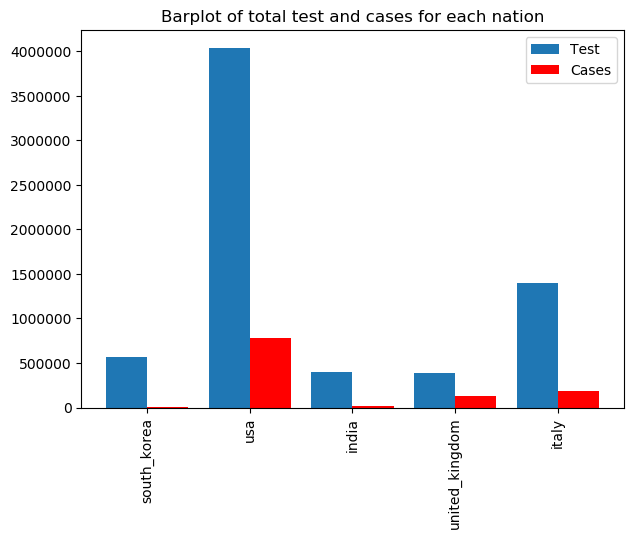

In [14]:
out.show()

<p>Put data togher and we will see the percentage of positive test foreach country <p>

In [15]:
%%capture out


data = []
index_state = []

for state in state_csv:
    index_state.append(state)
    ix = state_csv[state].index.get_loc("2020-03-24")
    test = 100/state_csv[state].iloc[ix, state_csv[state].columns.get_loc("total_test")]
    cases = test*state_csv[state].iloc[ix, state_csv[state].columns.get_loc("total_cases")]
    temp = {"total_test":test,"total_cases":cases}
    data.append(temp)

df = pd.DataFrame(data, index = index_state, columns = ["total_test", "total_cases"]) 

fig, axes = plt.subplots(figsize=(7,5), dpi=100)

plt.bar(df.index, height=df.total_cases)
plt.legend(["Cases in %"])


plt.setp(plt.gca().xaxis.get_majorticklabels(),rotation=90)
plt.title('Barplot of total test and cases on 20/04/2020 in %')
    


Text(0.5, 1.0, 'Barplot of total test and cases on 20/04/2020 in %')

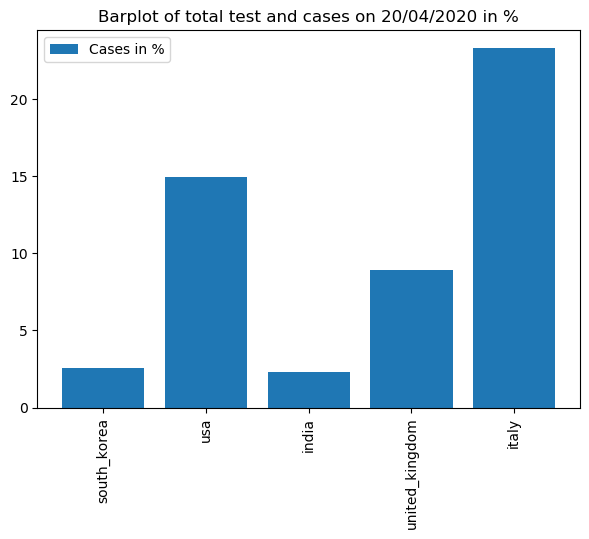

In [16]:
out.show()

# Time series

### How the epidemic evoled during time

Comparison between:
<ul>
<li> <b>total cases</b> </li> 
<li> <b>number of test</b> </li>  
</ul>

In [17]:
def time_series(state):

    x = state_csv[state].index
    y1 = state_csv[state].daily_cases.values
    y2 = state_csv[state].daily_test.values

    fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
    plt.fill_between(x, y1=y1,  alpha=0.5, linewidth=2, color='seagreen')
    plt.fill_between(x, y1=-y2, alpha=0.5, linewidth=2, color='red')
    plt.title('Infected over test ' + state, fontsize=16)
    plt.legend(["Total Cases", "Total Test"], loc = 3)
    plt.hlines(y=0, xmin=np.min(state_csv[state].index), xmax=np.max(state_csv[state].index), linewidth=1)
    plt.setp(plt.gca().xaxis.get_majorticklabels(),rotation=90)
    
    plt.show()

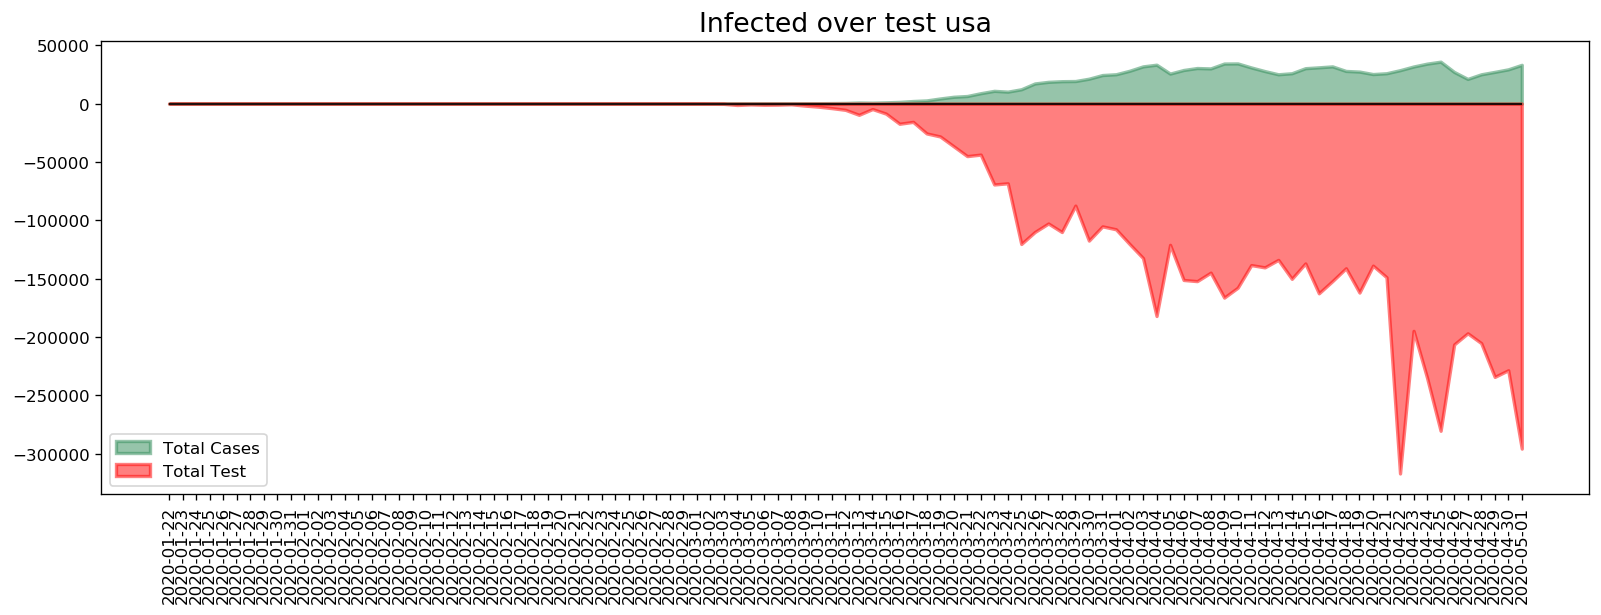

In [18]:
time_series("usa")

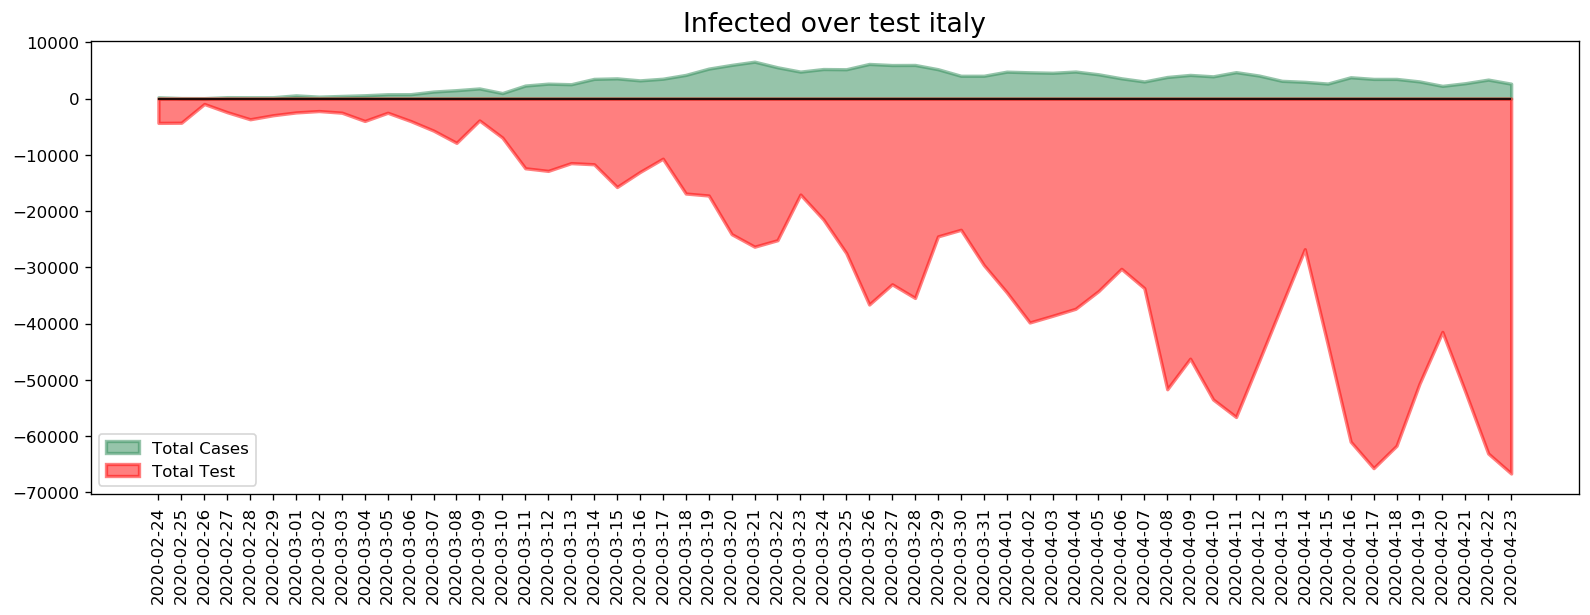

In [19]:
time_series("italy")

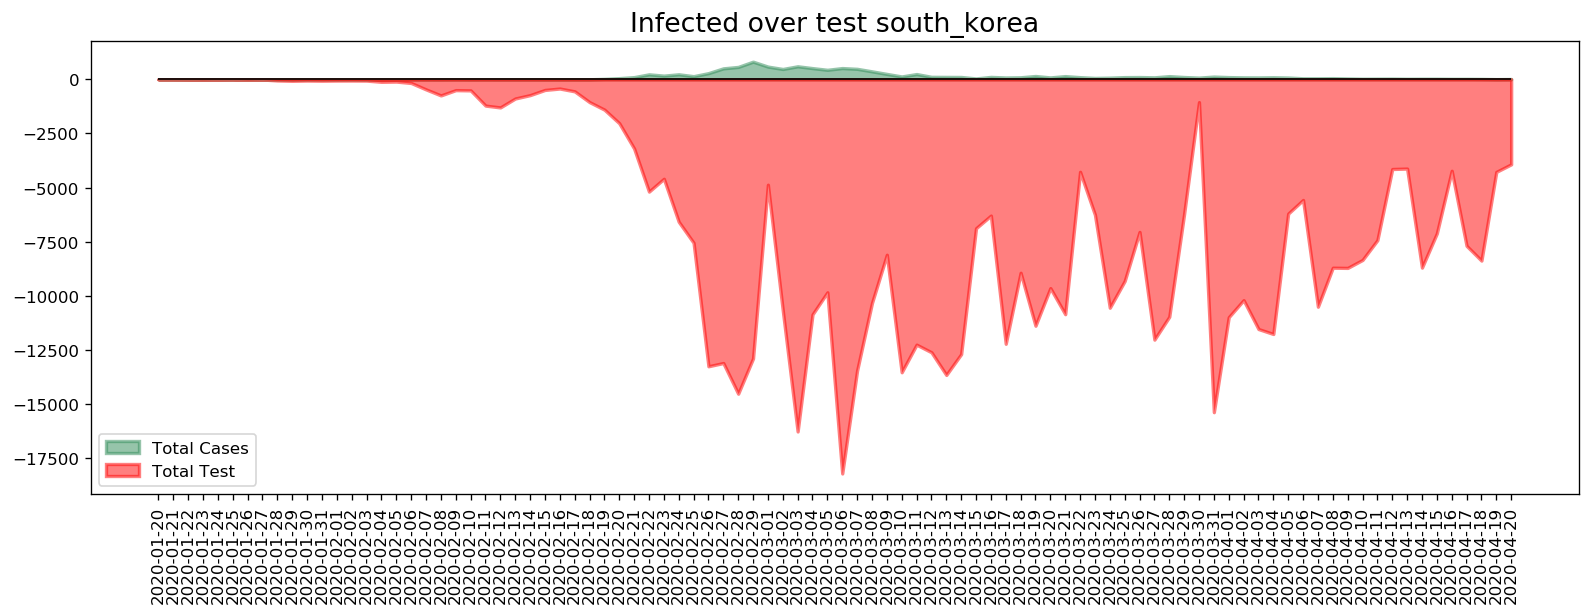

In [20]:
time_series("south_korea")

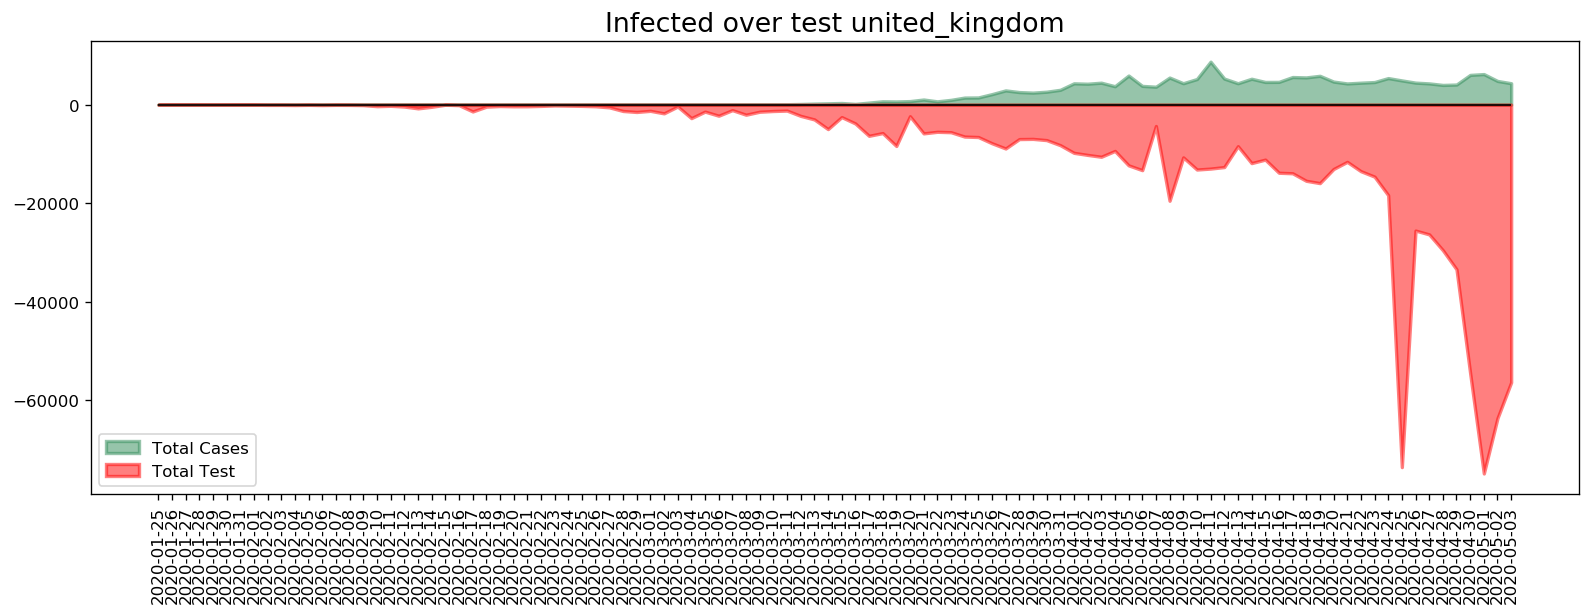

In [21]:
time_series("united_kingdom")

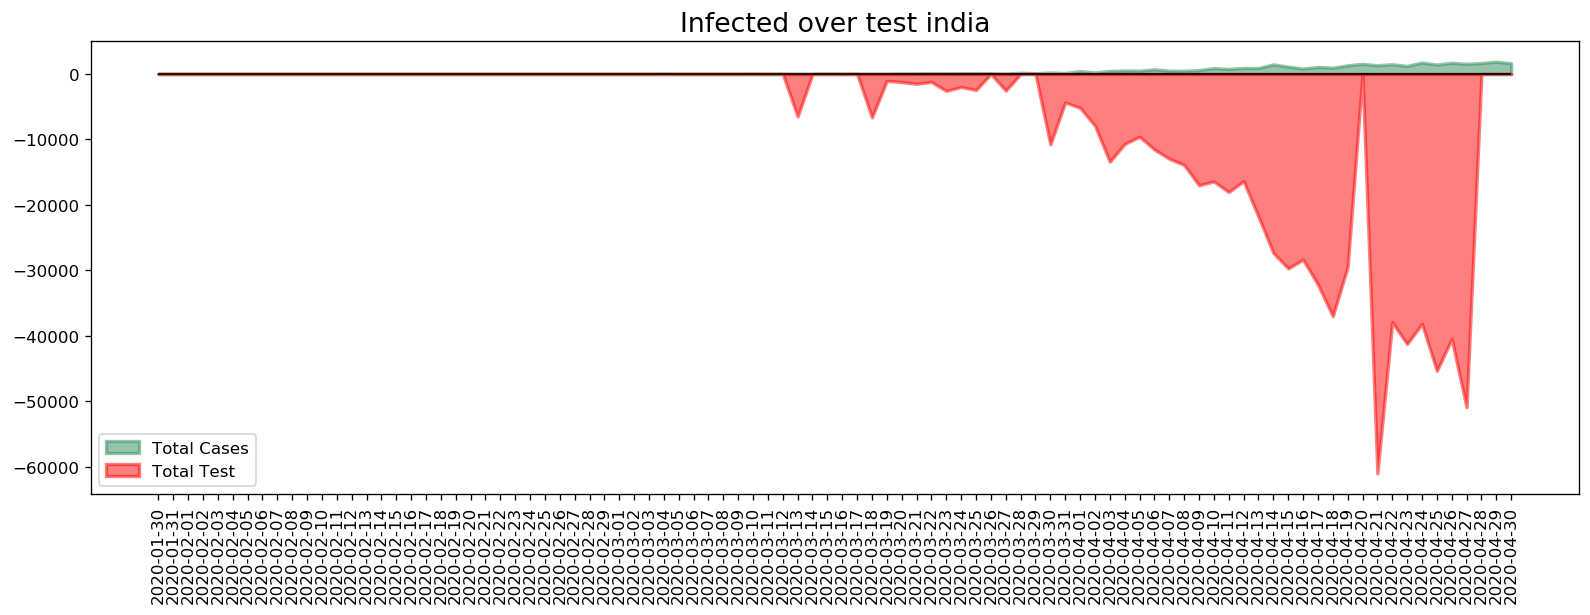

In [22]:
time_series("india")

In [23]:
%cd ..
%run -i ts.py

import numpy as np
import pandas as pd
import seaborn as sns

test = state_csv["italy"]
newindex = pd.DatetimeIndex(test.index)
test.index = newindex

/Users/andre/Desktop/University/Masters/Second year/Second semester/Data Science for business/Lezioni/4° Lezione - 1° Lab/datasciencebusiness


## Quantitave analisys

<p>Weekly box graph of daily cases</p>

In [24]:
def box_graph(state):
    dummystate = state_csv[state]
    newindex = pd.DatetimeIndex(dummystate.index)
    dummystate.index = newindex
    plot_interval(dummystate, state, ['daily_cases'], 'week')

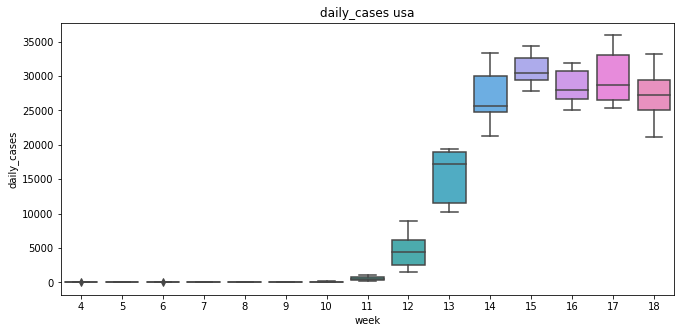

In [25]:
box_graph("usa")

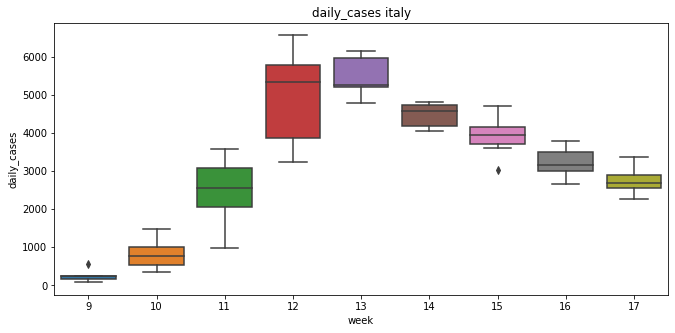

In [26]:
box_graph("italy")

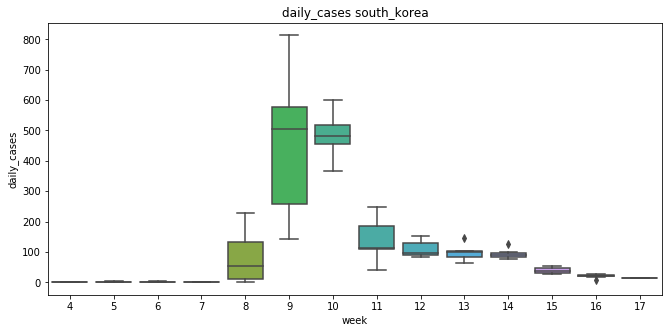

In [27]:
box_graph("south_korea")

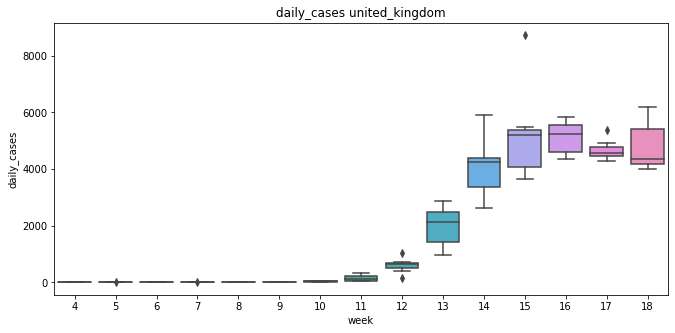

In [28]:
box_graph("united_kingdom")

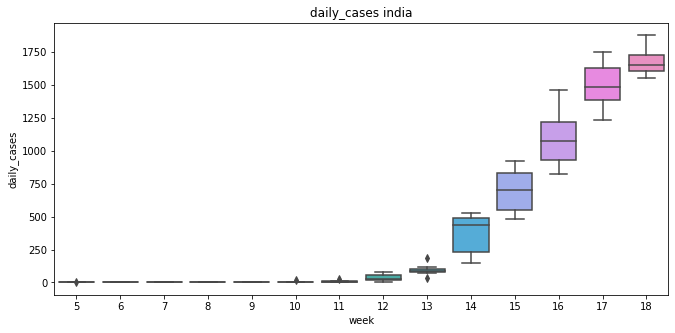

In [29]:
box_graph("india")

# Lags analisys

<ul>
<li> Comparison between number of daily cases</li>
<li> Compare lags <b>t</b> with lags <b>t + x</b> for the number of daily cases found</li>
 </ul>

In [30]:
from pandas.plotting import lag_plot

def plot_lag(state):
    fig, axes = plt.subplots(1, 4, figsize=(11,5), sharex=True, sharey=True, dpi=100)
    for i, ax in enumerate(axes.flatten()[:4]):
        lag_plot(state_csv[state].daily_cases, lag=i+1, ax=ax, c='firebrick')
        ax.set_title('Lag ' + str(i+1))
        plt.legend(["Daily Cases"])


    fig.suptitle('Lag Plots of Daily Cases: ' + state, y=1.05)    
    plt.show()

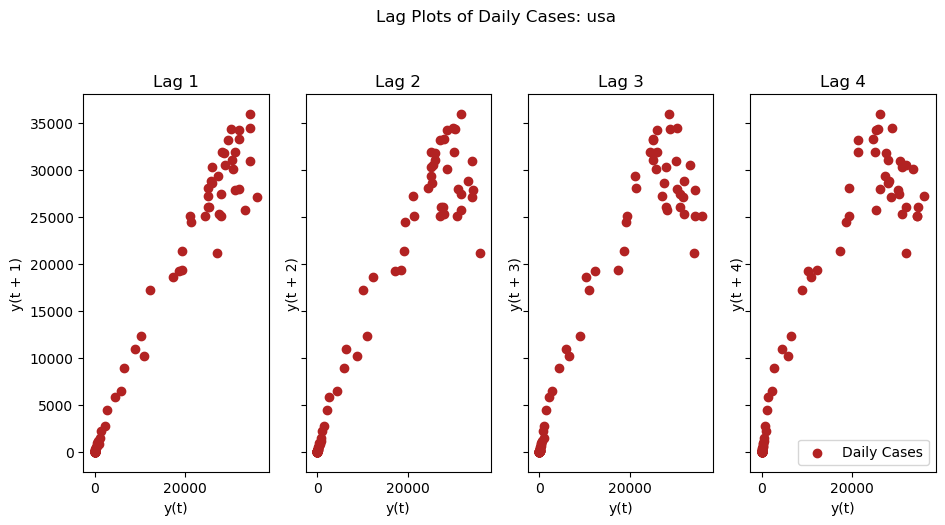

In [31]:
plot_lag("usa")

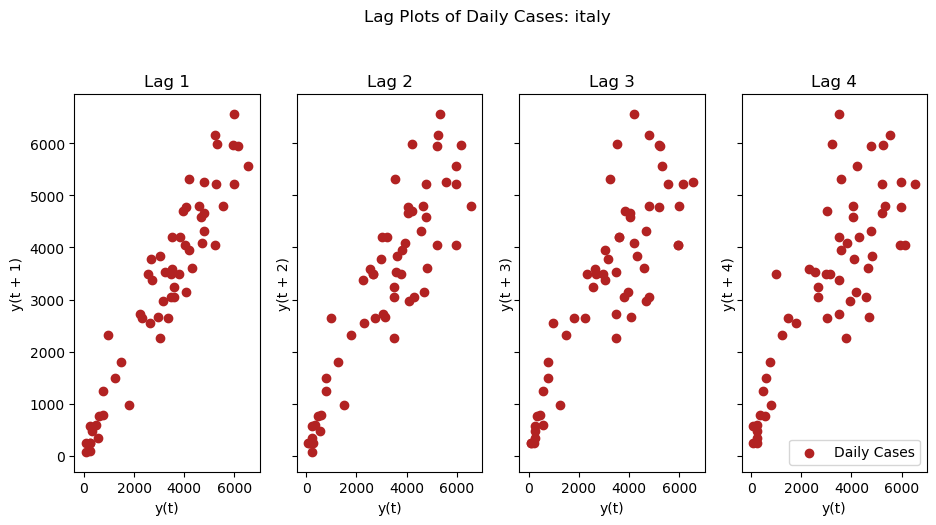

In [32]:
plot_lag("italy")

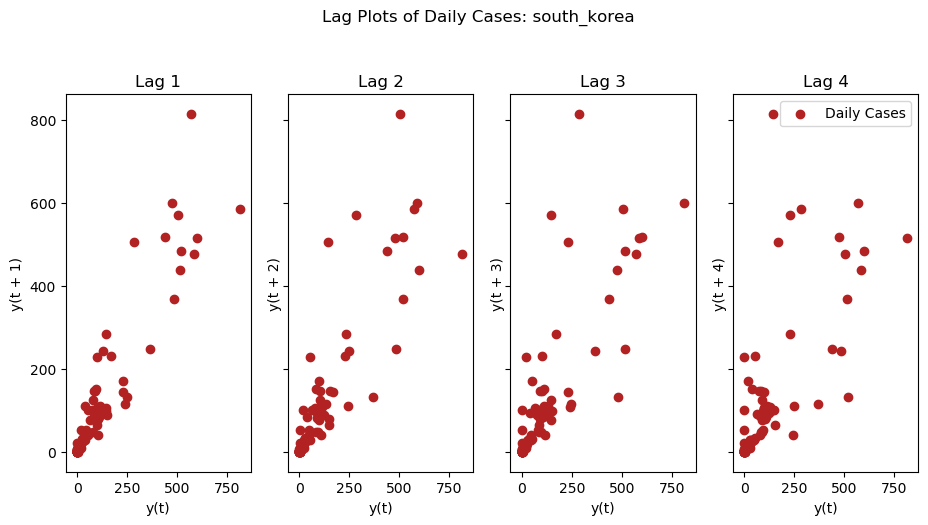

In [33]:
plot_lag("south_korea")

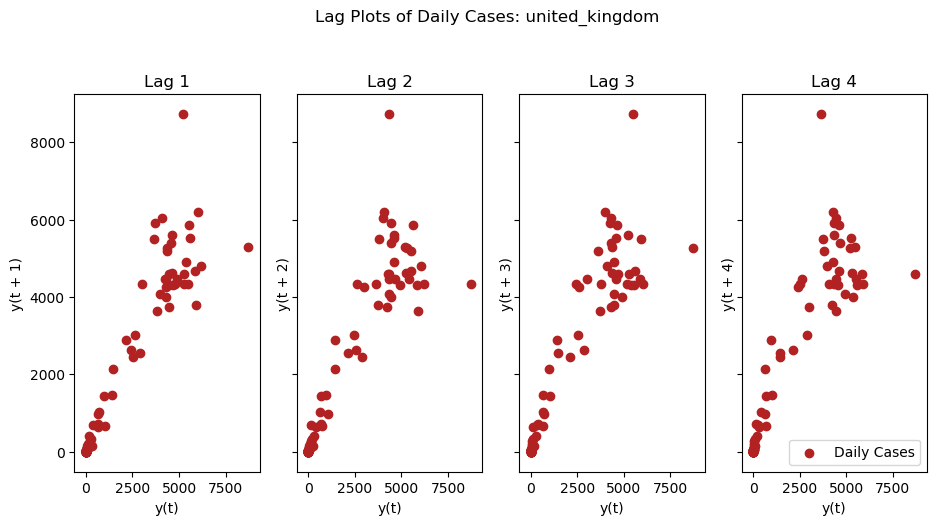

In [34]:
plot_lag("united_kingdom")

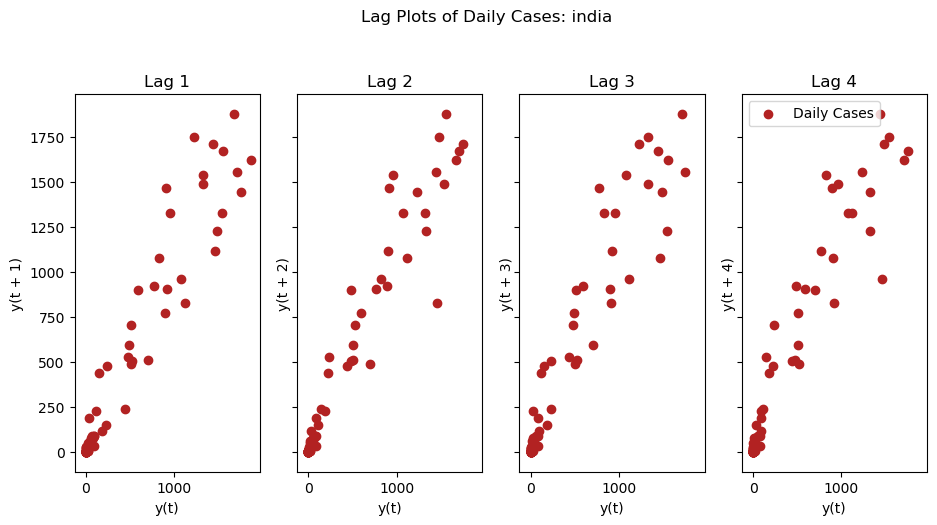

In [35]:
plot_lag("india")

## Autocorrelation of daily cases

In [36]:
shift_1 = state_csv["usa"].daily_cases.autocorr(lag=1)
print(shift_1)
print(len( state_csv["usa"].daily_cases))

0.9883466561075996
101


In [37]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_autocorrelation(state):
    fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
    plot_acf(state_csv[state].daily_cases.tolist(), lags=len(state_csv[state].index)-1, ax=axes[0], title= "Autocorrelation " + state)
    plt.legend(["Daily Cases"])
    plot_pacf(state_csv[state].daily_cases.tolist(), lags=len(state_csv[state].index)-1, ax=axes[1], title= "Partial Autocorrelation " + state)
    plt.legend(["Daily Cases"])

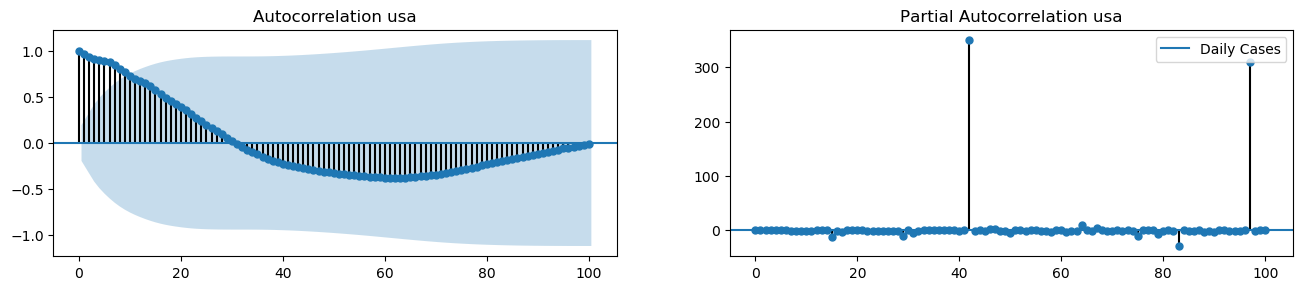

In [38]:
plot_autocorrelation("usa")

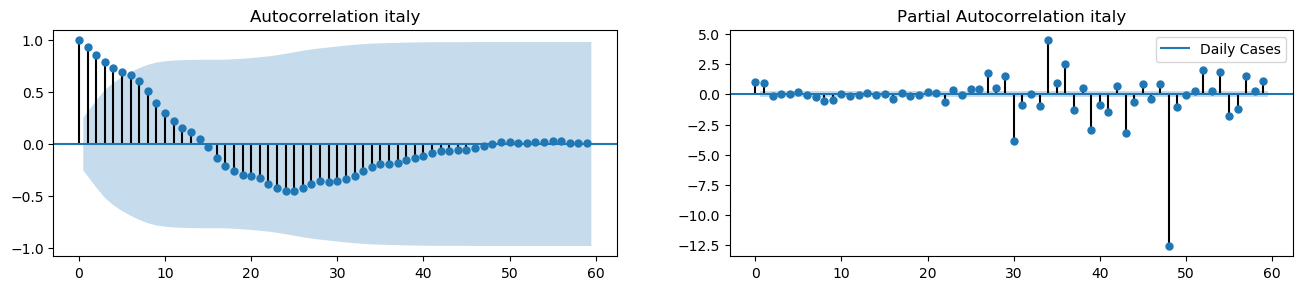

In [39]:
plot_autocorrelation("italy")

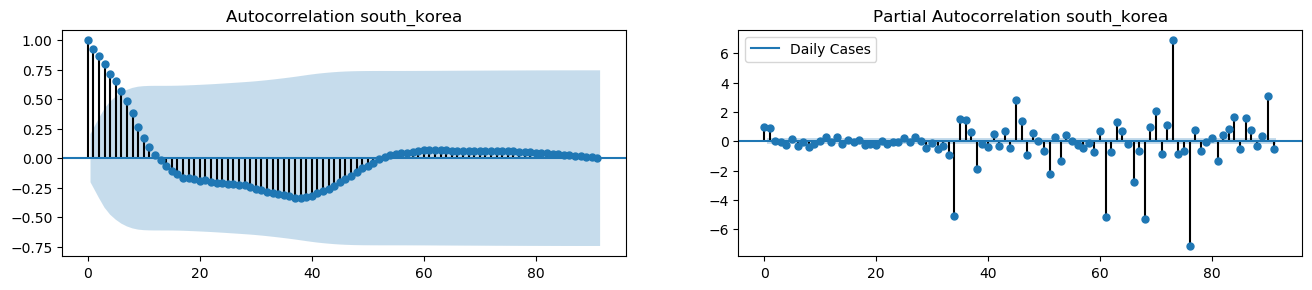

In [40]:
plot_autocorrelation("south_korea")

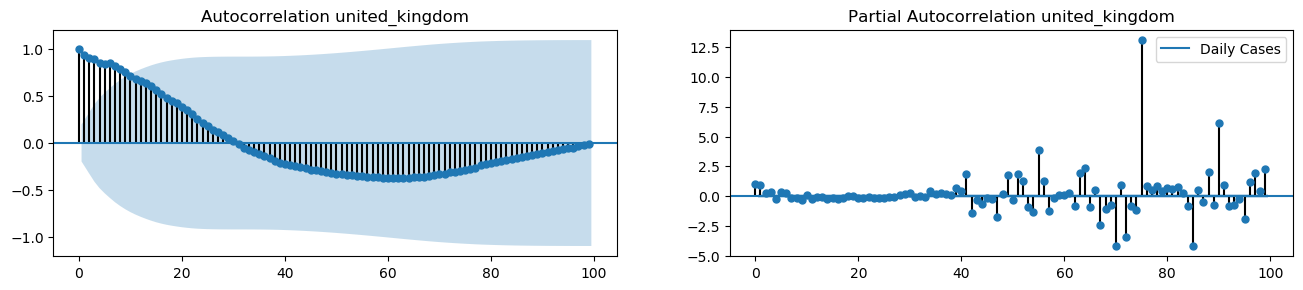

In [41]:
plot_autocorrelation("united_kingdom")

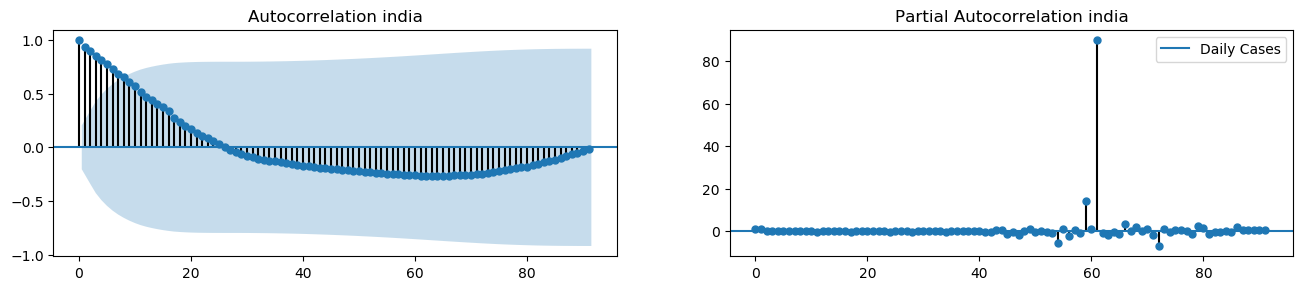

In [42]:
plot_autocorrelation("india")

 ## Stationarity analisys

In [43]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries, state):
    """
    Check Stationariety of time series.
    Please use np.array or pd.series as Input with your TS data only
    """
    #Convert numpy array to pandas serie
    if type(timeseries) is np.ndarray:
        df_timeseries = pd.Series(timeseries) 
        
    try:
        #Determing rolling statistics
        rolmean = df_timeseries.rolling(window=12).mean()
        rolstd = df_timeseries.rolling(window=12).std()

        #Plot rolling statistics:
        orig = plt.plot(timeseries, color='blue',label='Original')
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label = 'Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation of ' + state)
        plt.show(block=False)

        #Perform Dickey-Fuller test:
        print('Results of Dickey-Fuller Test:')

        dftest = adfuller(timeseries, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key,value in dftest[4].items():
            dfoutput['Critical Value (%s)'%key] = value
        
        # print(dfoutput)
    
        return dftest, dfoutput
    except Exception as message:
        print(f"Impossible to calc the stationariery of your TS: {message}")
        return None, None

In [44]:
def stationarity(state):
    dftest, dfoutput = test_stationarity(state_csv[state].daily_cases.values, state)

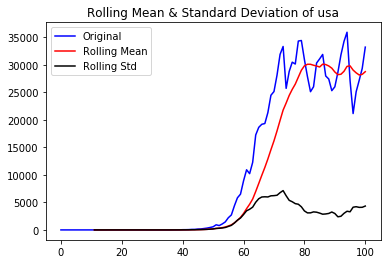

Results of Dickey-Fuller Test:


In [45]:
stationarity("usa")

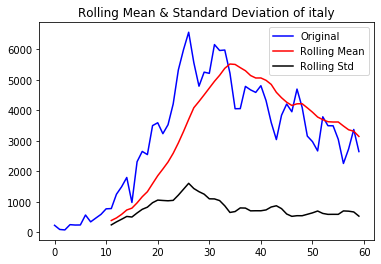

Results of Dickey-Fuller Test:


In [46]:
stationarity("italy")

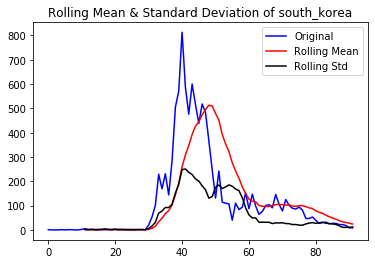

Results of Dickey-Fuller Test:


In [47]:
stationarity("south_korea")

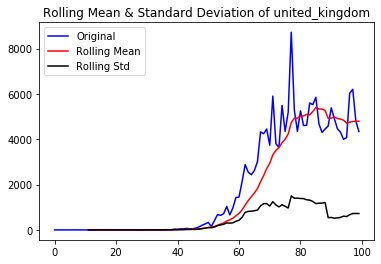

Results of Dickey-Fuller Test:


In [48]:
stationarity("united_kingdom")

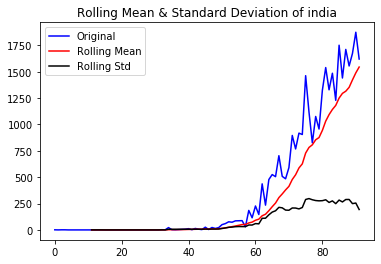

Results of Dickey-Fuller Test:


In [49]:
stationarity("india")

## Daily cases

<p>Now that we have see the behavior of each country about the test, let's see how infected found evolved during time:<p>
<ul>
    <li> The first vertical line indicate the beginning of the state of quarantine </li>
    <li> The second vertical line indicate approximately the 15 days of incubation time </li>
</ul>

### Note: Nations that didn't start a complete level of lockdown

<p>On 27 March, dozens of <b>Indonesian</b> medical professors have called for “local lockdowns”, saying that the government's policy of physical distancing is not “effective”, so we estimate that as a started date.</p>

<p>The rapid and extensive tests taken by <b>South Korea</b> have been judged successful in limiting the spread of the outbreak, without using the drastic measure of quarantining entire cities. As of 25 February, Daegu officials were aggressively warning residents to take precautions, while allowing private businesses such as restaurants to stay open, we use that date as a started date.
</p>

<p>Setup a lockdown policies meter and school closure manually. </p>

<p>Lockdown meter legend:</p>
<ul>
    <li>Level 0: no-lockdown</li>
    <li>Level 1: Mass screening and isolate who has been in contact with infected</li>
    <li>Level 2: Max level of lockdown</li>
</ul>


In [50]:
level_1_of_lockdown = {"india": datetime.datetime(2020,3,22),
                     "italy": datetime.datetime(2020,2,21),
                     "indonesia": datetime.datetime(2020,3,15),
                     "south_korea": datetime.datetime(2020,2,25),
                     "united_kingdom": datetime.datetime(2020,3,16),
                     "usa":datetime.datetime(2020,3,13)} #Mean

level_2_of_lockdown = {"india": datetime.datetime(2020,3,24),
                     "italy": datetime.datetime(2020,3,9),
                     "united_kingdom": datetime.datetime(2020,3,23),
                     "usa":datetime.datetime(2020,3,20),
                     "indonesia": None,
                     "south_korea": None}

school_closure = {"india": datetime.datetime(2020,3,17),
                     "italy": datetime.datetime(2020,2,23),
                     "indonesia": datetime.datetime(2020,3,16),
                     "south_korea": datetime.datetime(2020,3,2),
                     "united_kingdom": datetime.datetime(2020,3,20),
                     "usa":datetime.datetime(2020,3,16)}

INC_TIME = timedelta(days=15)

In [51]:
import matplotlib.dates as mdates

def plot_lvl_lockdown(state):
    plt.title('Daily cases in ' + state)
    plt.plot(state_csv[state].index, state_csv[state].daily_cases, 'r')
    
    plt.axvline(level_1_of_lockdown[state], 0, 1, color = "grey")
    plt.axvline(school_closure[state], 0, 1, color = "blue")
    
    try:
        plt.axvline(level_2_of_lockdown[state], 0, 1, color = "k")
        plt.axvline(level_2_of_lockdown[state]+INC_TIME, 0, 1, color = "k")
        plt.legend(["Cases", "Level 1", "School clousre", "Level 2", "Level 2 + INC"])
    except:
        plt.axvline(level_1_of_lockdown[state]+INC_TIME, 0, 1, color = "k")
        plt.legend(["Cases", "Level 1", "School clousre", "Level 1 + INC"])

    plt.setp(plt.gca().xaxis.get_majorticklabels(),rotation=90)
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=4))
    plt.gca().xaxis.set_minor_locator(mdates.DayLocator())

    plt.xlabel('Date')
    plt.ylabel('Number per day')
    plt.show()

### Policies and cases on timeline

<p> Below here we plotted some graph explaining daily cases giving a stress on the date when the country adopted anti-pandemic policies</p>

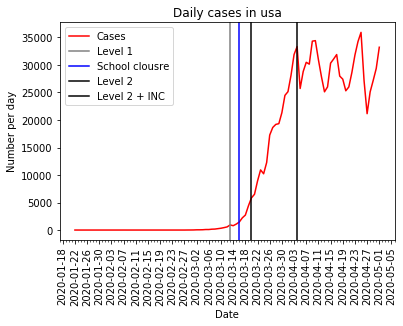

In [52]:
plot_lvl_lockdown("usa")

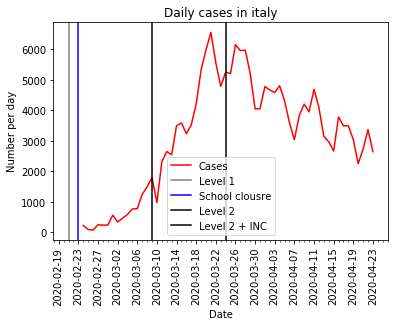

In [53]:
plot_lvl_lockdown("italy")

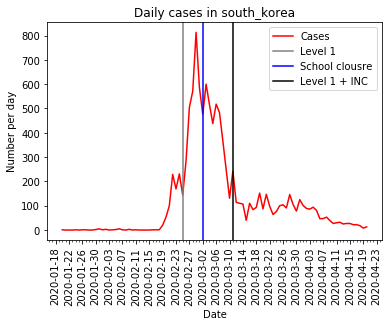

In [54]:
plot_lvl_lockdown("south_korea")

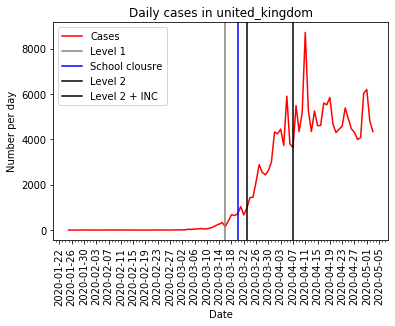

In [55]:
plot_lvl_lockdown("united_kingdom")

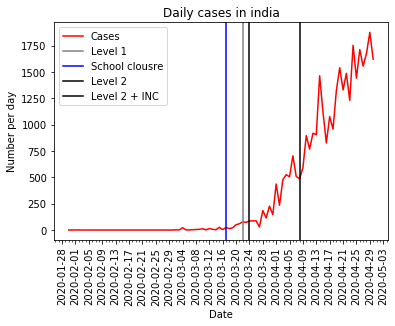

In [56]:
plot_lvl_lockdown("india")

# Build dataframe for Alg

<p>Starting with the dataframe foreach country that we used for make the analisys we build a new dataframe with more features and selecting only the features available foreach country.</p>

## New temporal features
<p>We want to give a stress on <b>WHEN</b> our record are beloging to, in this way we suppose to give more tools to our alg for identify and discriminate the data using time, following features will be added:
</p>

<ul>
    <li> day_zero, when the country has reached 100 cases of infected </li>
    <li> delta_day_zero, the days delta between record date and country day_zero </li>
    <li> week_year, number of the week record date belonging to </li>
    <li> day_year, number of the day record date belonging to </li>
    <li> day_week, number of the weekday record date belonging to </li>
    <li> day_week_sin, since day_week is ciclic value we need this trasformation for compute distance between record </li>
    <li> day_week_cos, since day_week is ciclic value we need this trasformation for compute distance between record </li>
</ul>

In [57]:
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

In [58]:
#data = pd.date_range('2020-01-01', periods=1, freq='D')
mgc = pd.DataFrame()

for state in states:
    temp = state_csv[state].copy()
    day_zero = temp.total_cases[temp["total_cases"]>100].index[0]
    temp["delta_day_zero"] = (temp.index-day_zero).days
    temp["country"] = state
    pop_sts = population[population["AgeGrp"]=="0-100"]
    pop = (pop_sts[pop_sts.index.values == state].PopTotal.values[0]*1000).round(0)
    temp["population"] = int(pop)
    temp = [temp, mgc]
    mgc = pd.concat(temp , sort=True)
    
mgc = mgc.dropna(axis = 1)
mgc
#mgc.loc[:,mgc.isnull().any()]


,country,daily_cases,daily_dead,daily_test,delta_day_zero,population,total_cases,total_dead,total_test
date,,,,,,,,,
2020-02-24,italy,229,7,4324,0,60461828,229,7,4324
2020-02-25,italy,93,3,4299,1,60461828,322,10,8623
2020-02-26,italy,78,2,964,2,60461828,400,12,9587
2020-02-27,italy,250,5,2427,3,60461828,650,17,12014
2020-02-28,italy,238,4,3681,4,60461828,888,21,15695
...,...,...,...,...,...,...,...,...,...
2020-04-16,south_korea,22,4,4223,56,51269183,10613,229,538775
2020-04-17,south_korea,22,1,7688,57,51269183,10635,230,546463
2020-04-18,south_korea,18,2,8371,58,51269183,10653,232,554834


In [59]:
mgc['week_year'] = mgc.index.strftime("%W")
mgc['day_year'] = mgc.index.strftime("%j")
mgc['day_week'] = mgc.index.strftime("%w")

In [60]:
mgc

,country,daily_cases,daily_dead,daily_test,delta_day_zero,population,total_cases,total_dead,total_test,week_year,day_year,day_week
date,,,,,,,,,,,,
2020-02-24,italy,229,7,4324,0,60461828,229,7,4324,08,055,1
2020-02-25,italy,93,3,4299,1,60461828,322,10,8623,08,056,2
2020-02-26,italy,78,2,964,2,60461828,400,12,9587,08,057,3
2020-02-27,italy,250,5,2427,3,60461828,650,17,12014,08,058,4
2020-02-28,italy,238,4,3681,4,60461828,888,21,15695,08,059,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-16,south_korea,22,4,4223,56,51269183,10613,229,538775,15,107,4
2020-04-17,south_korea,22,1,7688,57,51269183,10635,230,546463,15,108,5
2020-04-18,south_korea,18,2,8371,58,51269183,10653,232,554834,15,109,6


In [61]:
mgc['day_week_sin'] = np.sin(2 * np.pi * mgc['day_week'].astype(int)/6.0)
mgc['day_week_cos'] = np.cos(2 * np.pi * mgc['day_week'].astype(int)/6.0)

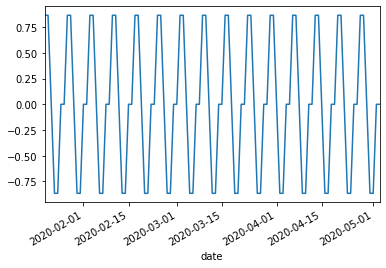

In [62]:
ax = mgc['day_week_sin'].plot()

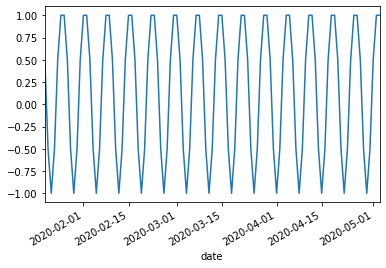

In [63]:
ax = mgc['day_week_cos'].plot()

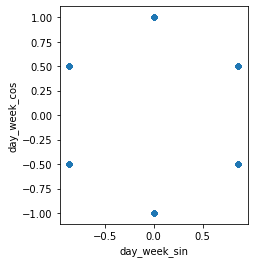

In [64]:
ax = mgc.plot.scatter('day_week_sin', 'day_week_cos').set_aspect('equal')

## Country related features

<p>Since we are dealing with data belonging from different state we'll add some features about the trait of each country, then we'll compute some other using country data and epidemic data for each country, following features will be added:</p> 

<ul>
    <li> population, country population</li>
    <li> total_test_pc, total_test / population </li>
    <li> daily_test_pc, daily_test / population </li>
    <li> total_cases_pc, total_cases / population </li>
    <li> daily_cases_pc, daily_cases / population </li>
    <li> total_dead_pc, total_dead / population </li>
    <li> daily_dead_pc, daily_dead / population </li>
    <li> lethality, total_dead / total_cases </li>
    <li> GDP_pc, country GDP / population</li>
</ul>

In [65]:
col_pc = ["total_test_pc","daily_test_pc","total_cases_pc","daily_cases_pc", "total_dead_pc","daily_dead_pc","lethality","GDP_pc"]
mgc = mgc.reindex(columns=mgc.columns.tolist() + col_pc)
    
for i in range(len(mgc.index)):
    pop = mgc.iloc[i, mgc.columns.get_loc("population")]
    mgc.iloc[i, mgc.columns.get_loc("total_test_pc")] = mgc.iloc[i, mgc.columns.get_loc("total_test")]/pop
    mgc.iloc[i, mgc.columns.get_loc("daily_test_pc")] = mgc.iloc[i, mgc.columns.get_loc("daily_test")]/pop
    mgc.iloc[i, mgc.columns.get_loc("total_cases_pc")] = mgc.iloc[i, mgc.columns.get_loc("total_cases")]/pop
    mgc.iloc[i, mgc.columns.get_loc("daily_cases_pc")] = mgc.iloc[i, mgc.columns.get_loc("daily_cases")]/pop
    mgc.iloc[i, mgc.columns.get_loc("total_dead_pc")] = mgc.iloc[i, mgc.columns.get_loc("total_dead")]/pop
    mgc.iloc[i, mgc.columns.get_loc("daily_dead_pc")] = mgc.iloc[i, mgc.columns.get_loc("daily_dead")]/pop
    if mgc.iloc[i, mgc.columns.get_loc("total_dead")] > 0:
        mgc.iloc[i, mgc.columns.get_loc("lethality")] = mgc.iloc[i, mgc.columns.get_loc("total_dead")] / mgc.iloc[i, mgc.columns.get_loc("total_cases")]
    else:
        mgc.iloc[i, mgc.columns.get_loc("lethality")] = 0
    mgc.iloc[i, mgc.columns.get_loc("GDP_pc")] = (gdp[gdp.index.values == mgc.iloc[i, mgc.columns.get_loc("country")]]/pop).values[0][0]

### Deal with time of our data

<p>Since we have to perform a prediction we decide to get only the first 30 days from day zero to create  our cluster, the data beyond day zero plus 30 will be used to estimate the cases in the future.

In [66]:
mgc = mgc[mgc["delta_day_zero"] >= 0]

In [67]:
days_by_country = {}
for state in states:
    days_by_country[state] = int(mgc[mgc["country"]==state].count().country)
    
print(days_by_country)

{'south_korea': 61, 'usa': 60, 'india': 47, 'united_kingdom': 60, 'italy': 60}


In [68]:
#First 60 days after day zero
max_days = 59 
mgc_max_days_final = mgc.copy()
mgc_max_days_final = mgc_max_days_final[mgc_max_days_final["delta_day_zero"] <= max_days]

In [69]:
arima_dataset = mgc[mgc["country"] == "italy"]
arima_dataset = arima_dataset["daily_cases"]
len(arima_dataset)

60

In [70]:
mgc = mgc[mgc["delta_day_zero"] <= 31]
mgc

,country,daily_cases,daily_dead,daily_test,delta_day_zero,population,total_cases,total_dead,total_test,week_year,...,day_week_sin,day_week_cos,total_test_pc,daily_test_pc,total_cases_pc,daily_cases_pc,total_dead_pc,daily_dead_pc,lethality,GDP_pc
date,,,,,,,,,,,,,,,,,,,,,
2020-02-24,italy,229,7,4324,0,60461828,229,7,4324,08,...,8.660254e-01,0.5,0.000072,0.000072,0.000004,0.000004,1.157755e-07,1.157755e-07,0.030568,34465.783264
2020-02-25,italy,93,3,4299,1,60461828,322,10,8623,08,...,8.660254e-01,-0.5,0.000143,0.000071,0.000005,0.000002,1.653936e-07,4.961808e-08,0.031056,34465.783264
2020-02-26,italy,78,2,964,2,60461828,400,12,9587,08,...,1.224647e-16,-1.0,0.000159,0.000016,0.000007,0.000001,1.984723e-07,3.307872e-08,0.030000,34465.783264
2020-02-27,italy,250,5,2427,3,60461828,650,17,12014,08,...,-8.660254e-01,-0.5,0.000199,0.000040,0.000011,0.000004,2.811691e-07,8.269680e-08,0.026154,34465.783264
2020-02-28,italy,238,4,3681,4,60461828,888,21,15695,08,...,-8.660254e-01,0.5,0.000260,0.000061,0.000015,0.000004,3.473266e-07,6.615744e-08,0.023649,34465.783264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-18,south_korea,93,3,8931,27,51269183,8413,84,295647,11,...,1.224647e-16,-1.0,0.005767,0.000174,0.000164,0.000002,1.638411e-06,5.851468e-08,0.009985,31586.688268
2020-03-19,south_korea,152,7,11377,28,51269183,8565,91,307024,11,...,-8.660254e-01,-0.5,0.005988,0.000222,0.000167,0.000003,1.774945e-06,1.365343e-07,0.010625,31586.688268
2020-03-20,south_korea,87,3,9640,29,51269183,8652,94,316664,11,...,-8.660254e-01,0.5,0.006176,0.000188,0.000169,0.000002,1.833460e-06,5.851468e-08,0.010865,31586.688268


In [71]:
#Insert in the DataFrame the level of lockdown for each day and if school were closed or not
col_lockdown = ["level_of_lockdown","school_closure"]
mgc = mgc.reindex(columns=mgc.columns.tolist() + col_lockdown)

## Lockdown features

<p>Lets add the lockdown metric to our dataset, the new feature will be inclued as a simple incremental value, then dummized to fit better on clustering.</p>

In [72]:
for i in range(len(mgc.index)):
    country = mgc.iloc[i, mgc.columns.get_loc("country")]
    date = mgc.index[i].to_pydatetime()
    if(date < level_1_of_lockdown[country]):
        mgc.iloc[i, mgc.columns.get_loc("level_of_lockdown")] = 0
    elif(level_2_of_lockdown[country] is not None):
        if(date < level_2_of_lockdown[country]):
            mgc.iloc[i, mgc.columns.get_loc("level_of_lockdown")] = 1
        else:
            mgc.iloc[i, mgc.columns.get_loc("level_of_lockdown")] = 2 
    else:
        mgc.iloc[i, mgc.columns.get_loc("level_of_lockdown")] = 1

In [73]:
for i in range(len(mgc.index)):
    country = mgc.iloc[i, mgc.columns.get_loc("country")]
    date = mgc.index[i].to_pydatetime()
    if(date < school_closure[country]):
        mgc.iloc[i, mgc.columns.get_loc("school_closure")] = 0
    else:
        mgc.iloc[i, mgc.columns.get_loc("school_closure")] = 1

In [74]:
mgc = pd.get_dummies(mgc,
                   columns=['country', 'level_of_lockdown', 'school_closure'])
info = pd.get_dummies(info,
                   columns=['continent', 'political_spectrum'])

## Prescaling of features values

In [75]:
from sklearn import preprocessing

temp_mgc = mgc.copy()

#temp_mgc = temp_mgc.reset_index()
#temp_mgc.drop("date",axis=1,inplace=True)
#temp_mgc.drop("day_year",axis=1,inplace=True)
transf = preprocessing.MinMaxScaler().fit(temp_mgc)
temp_mgc = transf.transform(temp_mgc)
temp_mgc = pd.DataFrame(temp_mgc)

In [76]:
temp_mgc

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.007055,0.005824,0.032652,0.000000,0.006918,0.000453,0.000857,0.002502,0.125,0.072727,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.002791,0.002496,0.032463,0.032258,0.006918,0.000790,0.001225,0.005360,0.125,0.090909,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.002320,0.001664,0.007279,0.064516,0.006918,0.001073,0.001470,0.006001,0.125,0.109091,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.007714,0.004160,0.018327,0.096774,0.006918,0.001979,0.002082,0.007614,0.125,0.127273,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.007337,0.003328,0.027796,0.129032,0.006918,0.002841,0.002572,0.010060,0.125,0.145455,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.002791,0.002496,0.067441,0.870968,0.000000,0.030111,0.010288,0.196132,0.500,0.490909,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
156,0.004641,0.005824,0.085911,0.903226,0.000000,0.030662,0.011145,0.203694,0.500,0.509091,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
157,0.002603,0.002496,0.072795,0.935484,0.000000,0.030977,0.011513,0.210101,0.500,0.527273,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
158,0.004484,0.006656,0.081894,0.967742,0.000000,0.031510,0.012492,0.217310,0.500,0.545455,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [77]:
temp_mgc.columns = mgc.columns.tolist()
temp_mgc

,daily_cases,daily_dead,daily_test,delta_day_zero,population,total_cases,total_dead,total_test,week_year,day_year,...,country_india,country_italy,country_south_korea,country_united_kingdom,country_usa,level_of_lockdown_0.0,level_of_lockdown_1.0,level_of_lockdown_2.0,school_closure_0.0,school_closure_1.0
0,0.007055,0.005824,0.032652,0.000000,0.006918,0.000453,0.000857,0.002502,0.125,0.072727,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.002791,0.002496,0.032463,0.032258,0.006918,0.000790,0.001225,0.005360,0.125,0.090909,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.002320,0.001664,0.007279,0.064516,0.006918,0.001073,0.001470,0.006001,0.125,0.109091,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.007714,0.004160,0.018327,0.096774,0.006918,0.001979,0.002082,0.007614,0.125,0.127273,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.007337,0.003328,0.027796,0.129032,0.006918,0.002841,0.002572,0.010060,0.125,0.145455,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.002791,0.002496,0.067441,0.870968,0.000000,0.030111,0.010288,0.196132,0.500,0.490909,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
156,0.004641,0.005824,0.085911,0.903226,0.000000,0.030662,0.011145,0.203694,0.500,0.509091,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
157,0.002603,0.002496,0.072795,0.935484,0.000000,0.030977,0.011513,0.210101,0.500,0.527273,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
158,0.004484,0.006656,0.081894,0.967742,0.000000,0.031510,0.012492,0.217310,0.500,0.545455,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


# Clustering
<p>Proceeding with clustering our features we decided to use Kmeans for fit our model<p>

In [78]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

def doKMeans(df, columns, x, y):
    # Let's plot your data with a '.' marker, a 0.3 alpha at the Longitude,
    # and Latitude locations in your dataset. Longitude = x, Latitude = y
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(111)
    ax.scatter(x, y, marker='.', c='navy', alpha=0.8)
    
    # TODO: Filter `df` using indexing so it only contains Longitude and Latitude,
    # since the remaining columns aren't really applicable for this lab:
    df = df.loc[:, columns]
    
    # TODO: Use K-Means to try and find seven cluster centers in this df.
    # Be sure to name your kmeans model `model` so that the printing works.
    #
    model = KMeans(n_clusters=5)
    model.fit(df)
    KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)
    
    # Now we can print and plot the centroids:
    centroids = model.cluster_centers_
    print(centroids)
    ax.scatter(centroids[:,0], centroids[:,1], marker='*', c='red', alpha=0.8, linewidths=3, s=169)


## First fit

<p>For this clustering we used all pandemic features computed before, then we proceded to reduce the number of features and test different combination to get our "country behavior".
</p>

<p>
The final set of features choosen are:
<ul>
    <li>delta_day_zero</li>
    <li>total_test_pc</li>
    <li>daily_test_pc</li>
    <li>total_cases_pc</li>
    <li>daily_cases_pc</li>
    <li>total_dead_pc</li>
    <li>daily_dead_pc</li>
    <li>GDP_pc</li>
</ul>
</p>

In [79]:
columns = ['delta_day_zero', 'total_test_pc',
       'daily_test_pc', 'total_cases_pc', 'daily_cases_pc', 'total_dead_pc',
       'daily_dead_pc', 'GDP_pc']

temp_mgc2 = temp_mgc.loc[:, columns]

In [80]:
inertia = []

list_k = list(range(1,10))

for k in list_k:
    kmeans_test = KMeans(n_clusters=k)
    kmeans_test.fit(temp_mgc2)
    inertia.append(kmeans_test.inertia_)    

In [81]:
%%capture out
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertia, '-o')
plt.xlabel(r'Number of clusters k')
plt.ylabel('Sum of squared distance')

### Performance study

#### Elbow

Text(0, 0.5, 'Sum of squared distance')

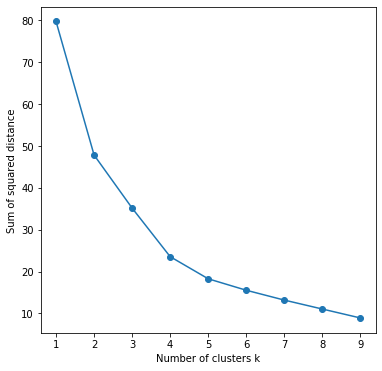

In [82]:
out.show()

#### Silhouette

In [83]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

def plot_sil(n_clusters, dataset):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots()
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dataset) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(dataset)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dataset, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dataset, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

def sil_score(dataset, range_n_clusters):

    for n_clusters in range_n_clusters:

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(dataset)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(dataset, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

In [84]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
print(sil_score(temp_mgc2, range_n_clusters))

For n_clusters = 2 The average silhouette_score is : 0.4060043501918941
For n_clusters = 3 The average silhouette_score is : 0.38273496105852367
For n_clusters = 4 The average silhouette_score is : 0.42026869906378933
For n_clusters = 5 The average silhouette_score is : 0.45911484802511693
For n_clusters = 6 The average silhouette_score is : 0.42805545144150486
For n_clusters = 7 The average silhouette_score is : 0.4460547717118743
For n_clusters = 8 The average silhouette_score is : 0.457310609995141
For n_clusters = 9 The average silhouette_score is : 0.4558065879445765
For n_clusters = 10 The average silhouette_score is : 0.46711511432854136
None


For n_clusters = 3 The average silhouette_score is : 0.38273496105852367


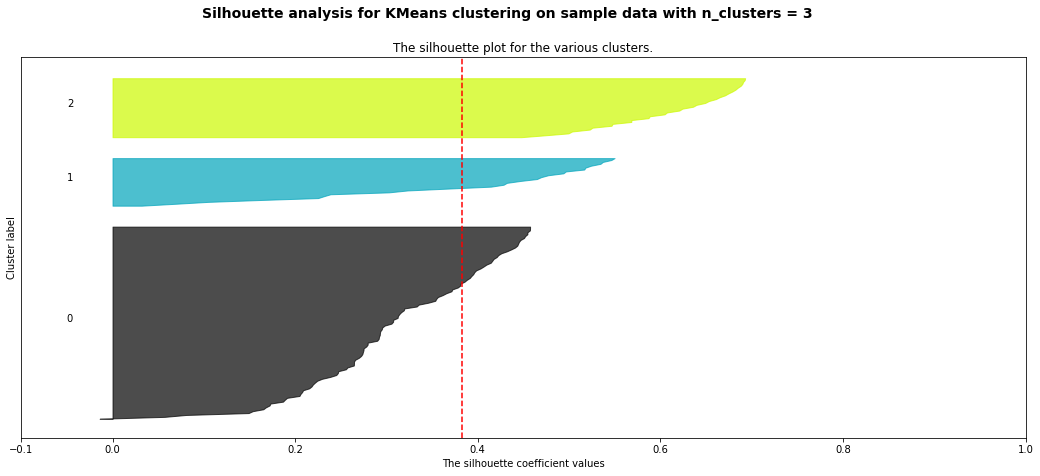

In [85]:
plot_sil(3, temp_mgc2)

For n_clusters = 4 The average silhouette_score is : 0.42026869906378933


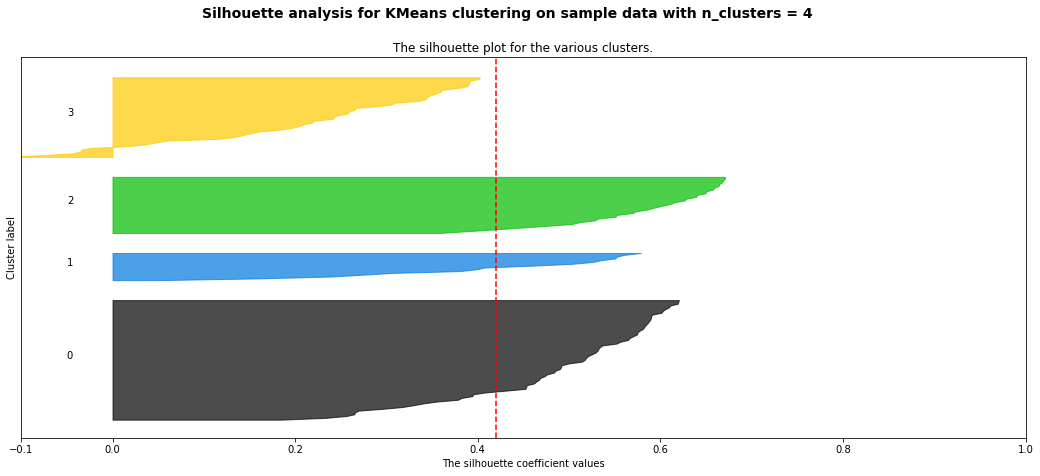

In [86]:
plot_sil(4, temp_mgc2)

For n_clusters = 2 The average silhouette_score is : 0.4060043501918941
For n_clusters = 3 The average silhouette_score is : 0.38273496105852367
For n_clusters = 4 The average silhouette_score is : 0.42026869906378933
For n_clusters = 5 The average silhouette_score is : 0.45911484802511693
For n_clusters = 6 The average silhouette_score is : 0.42805545144150486
For n_clusters = 7 The average silhouette_score is : 0.4460547717118743
For n_clusters = 8 The average silhouette_score is : 0.457310609995141
For n_clusters = 9 The average silhouette_score is : 0.4558065879445765
For n_clusters = 10 The average silhouette_score is : 0.46711511432854136


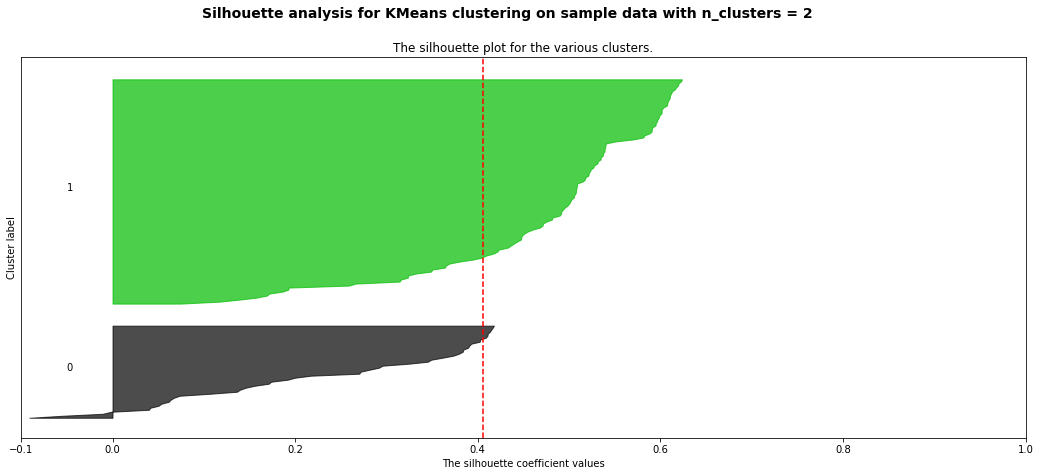

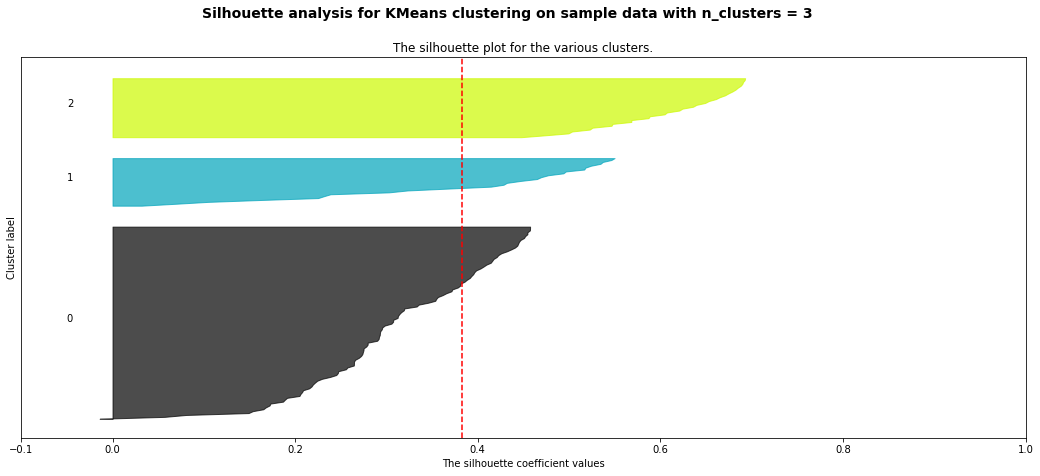

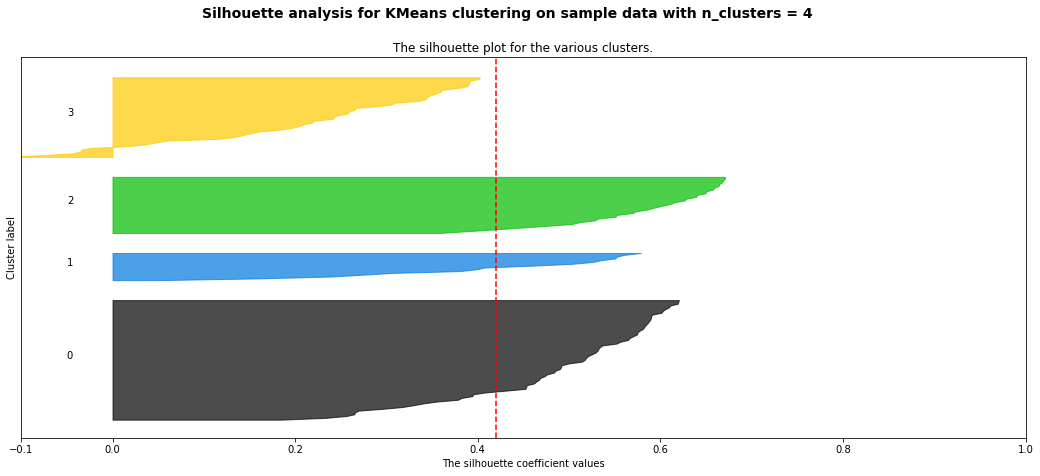

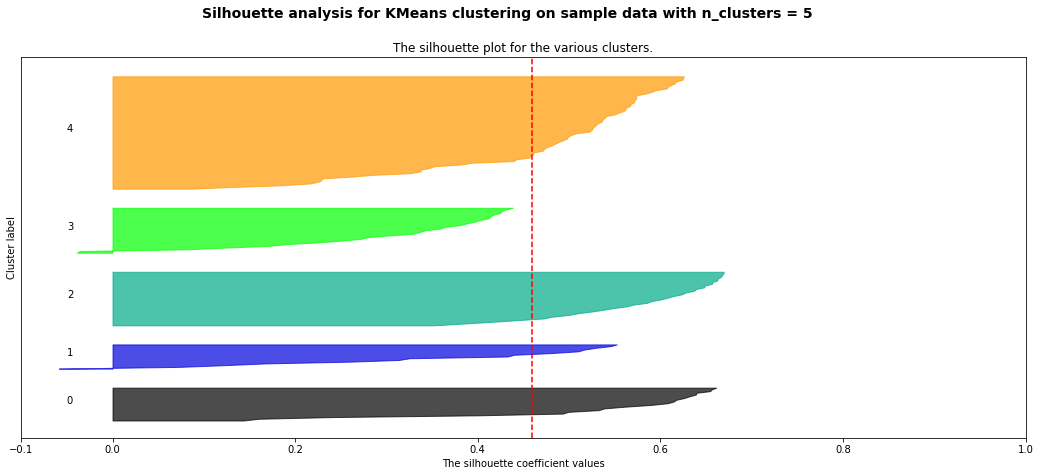

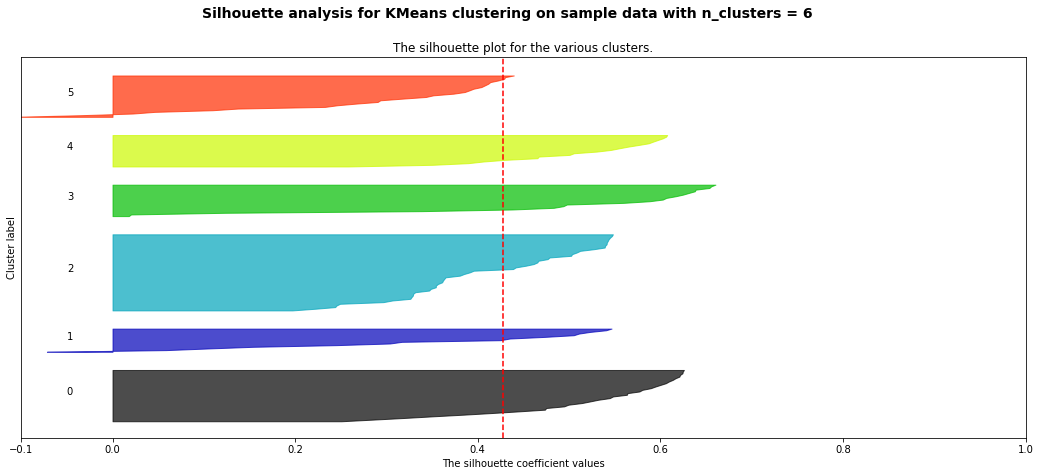

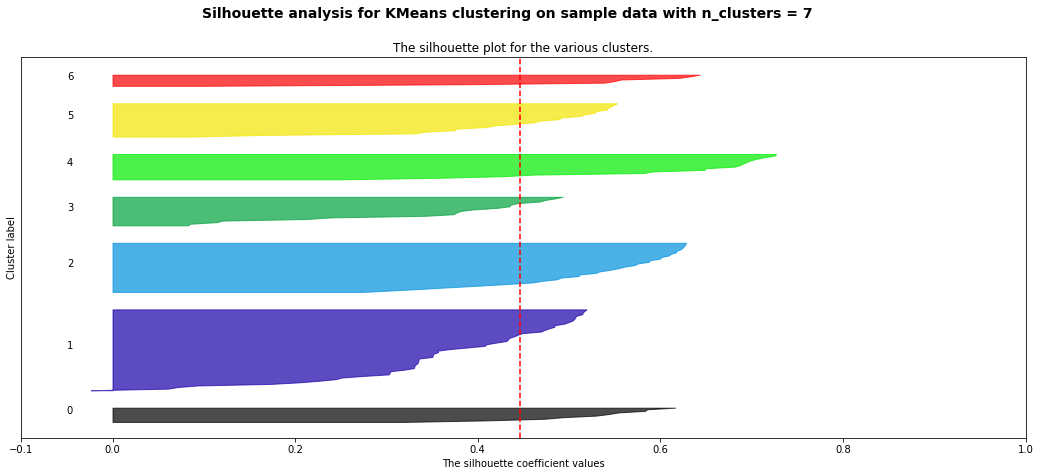

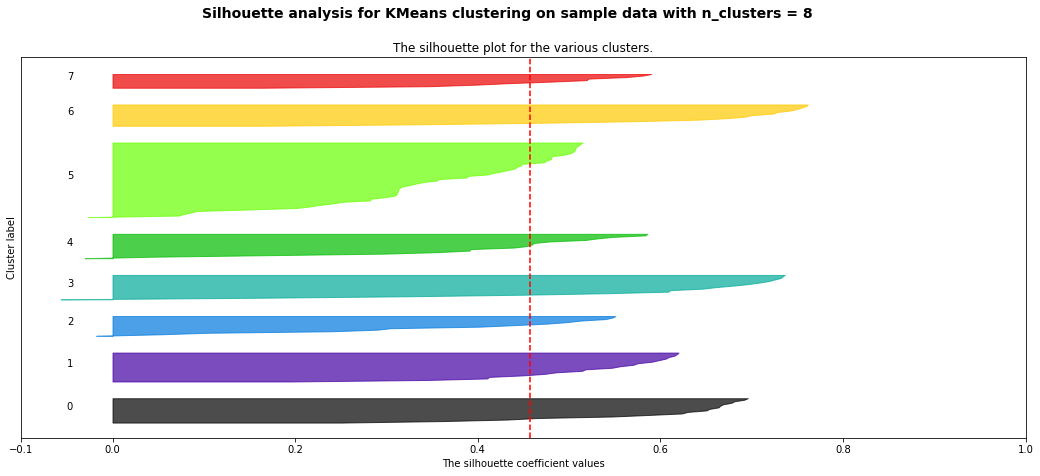

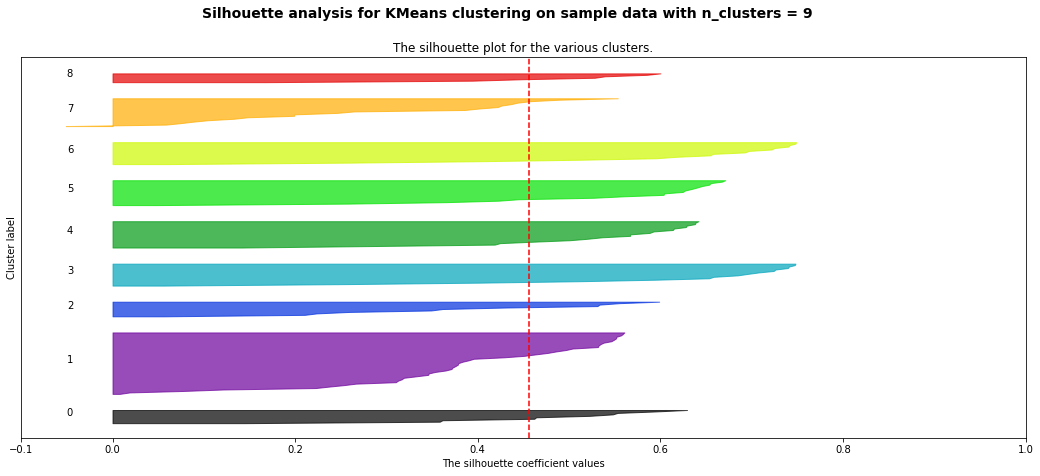

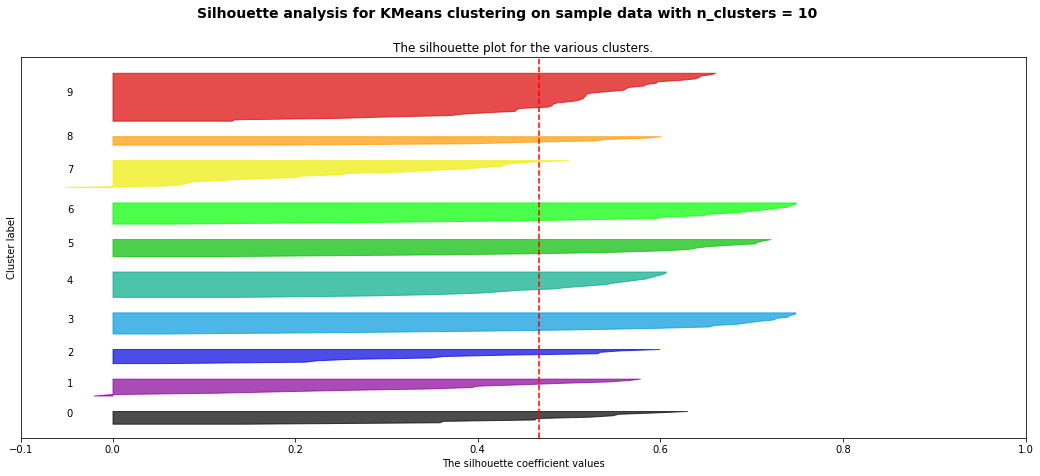

In [87]:



range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots()
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(temp_mgc2) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(temp_mgc2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(temp_mgc2, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(temp_mgc2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()



In [88]:
kmeans_test = KMeans(n_clusters=3)
kmeans_test.fit(temp_mgc2)
temp_mgc["labels"] = kmeans_test.labels_

In [89]:
temp_india = temp_mgc[temp_mgc["country_india"] == 1.0]
temp_italy = temp_mgc[temp_mgc["country_italy"] == 1.0]
temp_south_korea = temp_mgc[temp_mgc["country_south_korea"] == 1.0]
temp_united_kingdom = temp_mgc[temp_mgc["country_united_kingdom"] == 1.0]
temp_usa = temp_mgc[temp_mgc["country_usa"] == 1.0]

temp_states = [temp_india,
temp_italy,
temp_south_korea,
temp_united_kingdom,
temp_usa
]

In [90]:
import matplotlib.dates as mdates

def cluster_kmeans1(state):
    
    plt.plot(state.index, state.total_test_pc, 'red')
    plt.plot(state.index, state.daily_test_pc, 'blue')
    plt.plot(state.index, state.total_cases_pc, 'green')
    plt.plot(state.index, state.daily_cases_pc, 'yellow')
    plt.plot(state.index, state.total_dead_pc, 'black')
    plt.plot(state.index, state.daily_dead_pc, 'purple')
    #plt.plot(state.index, state.lethality, 'gray')
    plt.plot(state.index, state.GDP_pc, 'fuchsia')
   
    plt.legend(["Total Test", "Daily Test", "Total Cases", "Daily Cases", "Total Dead", "Daily Dead", "GDP"], loc='center left', bbox_to_anchor=(1, 0.5))
    
    temp1 = state[state["labels"] == 0]
    temp2 = state[state["labels"] == 1]
    temp3 = state[state["labels"] == 2]
    
    try:
        min1 = temp1.index.values.min()
        max1 = temp1.index.values.max() 
        plt.axvspan(min1, max1, facecolor='0.8', alpha=0.5)
    except:
        print("")
    
    try:
        min2 = temp2.index.values.min()
        max2 = temp2.index.values.max()
        plt.axvspan(min2, max2, facecolor='0.6', alpha=0.5)
    except:
        print("")
    
    try:
        min3 = temp3.index.values.min()
        max3 = temp3.index.values.max()
        plt.axvspan(min3, max3, facecolor='0.4', alpha=0.5)
    except:
        print("")


    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.show()

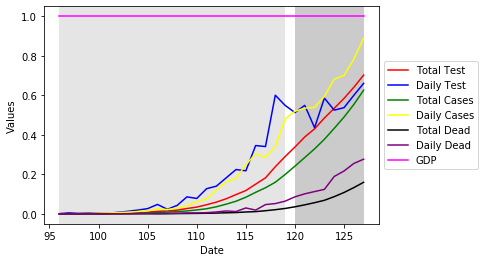

In [91]:
cluster_kmeans1(temp_usa)

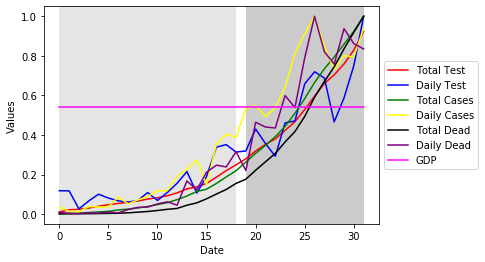

In [92]:
cluster_kmeans1(temp_italy)

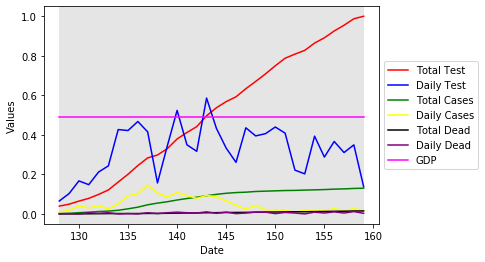

In [93]:
cluster_kmeans1(temp_south_korea)

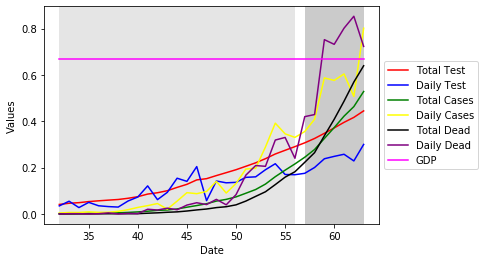

In [94]:
cluster_kmeans1(temp_united_kingdom)

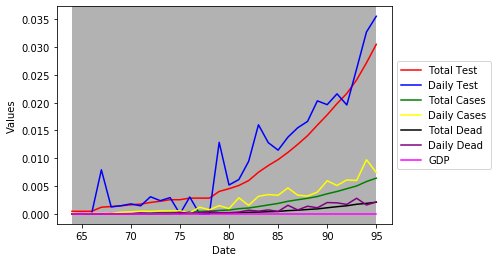

In [95]:
cluster_kmeans1(temp_india)

## Conclusion - First Fit

<p>We have chosen n=3 for this clustering and we see that we did not create a cluster that divide country according to their behavior, but we found a method to classify the trait of the pandemic foreach country.
So we want to continue in this way, giving more importance to classify the type of phase that each country has gone through. </p>

## Second fit

<p>For this clustering we decided to change a little bit the scope of our features selction, since Fit #1 showed us that we are not finding "country behavior" but a sort of "country phase description".
So we included some lockdown metric for country and we removed the time and the country GDP pro capite from our test.
</p>

<p>
The final set of features choosen is:
<ul>
    <li>total_test_pc</li>
    <li>daily_test_pc</li>
    <li>total_cases_pc</li>
    <li>daily_cases_pc</li>
    <li>total_dead_pc</li>
    <li>daily_dead_pc</li>
    <li>level_of_lockdown_0.0</li>
    <li>level_of_lockdown_1.0</li>
    <li>level_of_lockdown_2.0</li>
</ul>
</p>

In [96]:
columns = ['total_test_pc',
       'daily_test_pc', 'total_cases_pc', 'daily_cases_pc', 'total_dead_pc',
       'daily_dead_pc', 'level_of_lockdown_0.0', 'level_of_lockdown_1.0',
       'level_of_lockdown_2.0' ]

temp_mgc2 = temp_mgc.loc[:, columns]

In [97]:
inertia = []

list_k = list(range(1,10))

for k in list_k:
    kmeans_test = KMeans(n_clusters=k)
    kmeans_test.fit(temp_mgc2)
    inertia.append(kmeans_test.inertia_)

In [98]:
%%capture out

plt.figure(figsize=(6, 6))
plt.plot(list_k, inertia, '-o')
plt.xlabel(r'Number of clusters k')
plt.ylabel('Sum of squared distance')

### Performance study 

#### Elbow

Text(0, 0.5, 'Sum of squared distance')

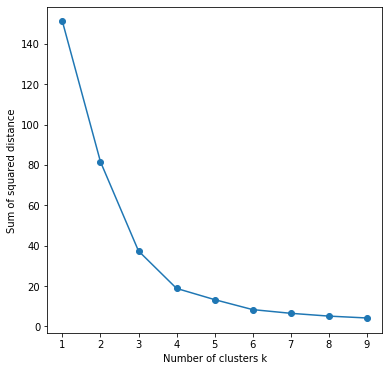

In [99]:
out.show()

#### Silhouette

In [100]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
print(sil_score(temp_mgc2, range_n_clusters))

For n_clusters = 2 The average silhouette_score is : 0.4980524284235871
For n_clusters = 3 The average silhouette_score is : 0.685087680734908
For n_clusters = 4 The average silhouette_score is : 0.6929761613119447
For n_clusters = 5 The average silhouette_score is : 0.667555943186746
For n_clusters = 6 The average silhouette_score is : 0.6557322711386135
For n_clusters = 7 The average silhouette_score is : 0.6501511335452947
For n_clusters = 8 The average silhouette_score is : 0.667958474097593
For n_clusters = 9 The average silhouette_score is : 0.6491120053551253
For n_clusters = 10 The average silhouette_score is : 0.6529078173127505
None


For n_clusters = 4 The average silhouette_score is : 0.6929761613119447


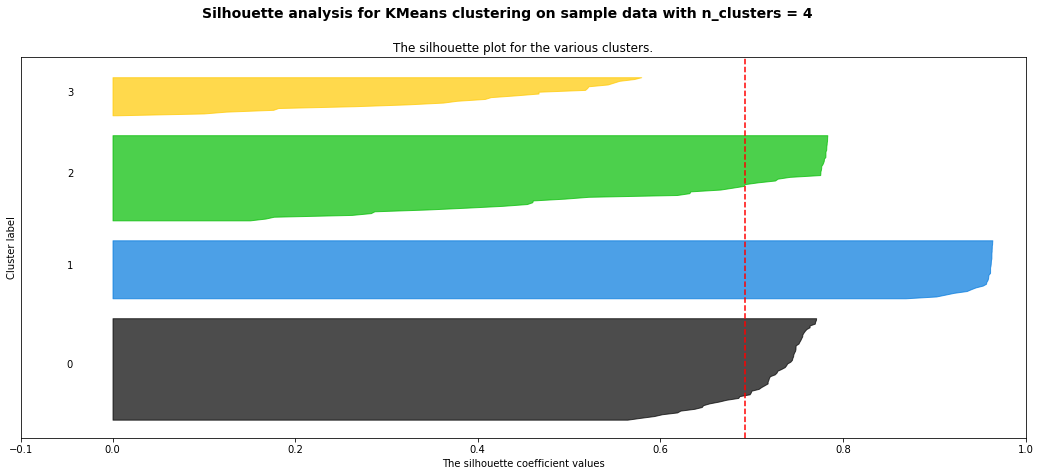

In [101]:
plot_sil(4, temp_mgc2)

For n_clusters = 3 The average silhouette_score is : 0.685087680734908


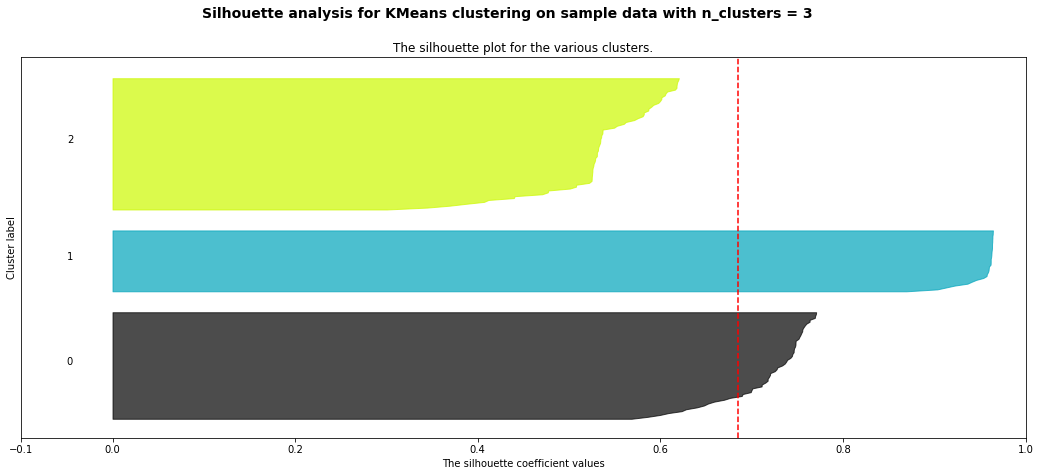

In [102]:
plot_sil(3, temp_mgc2)

For n_clusters = 2 The average silhouette_score is : 0.4980524284235871
For n_clusters = 3 The average silhouette_score is : 0.685087680734908
For n_clusters = 4 The average silhouette_score is : 0.6929761613119447
For n_clusters = 5 The average silhouette_score is : 0.667555943186746
For n_clusters = 6 The average silhouette_score is : 0.6557322711386135
For n_clusters = 7 The average silhouette_score is : 0.6501511335452947
For n_clusters = 8 The average silhouette_score is : 0.667958474097593
For n_clusters = 9 The average silhouette_score is : 0.6491120053551253
For n_clusters = 10 The average silhouette_score is : 0.6529078173127505


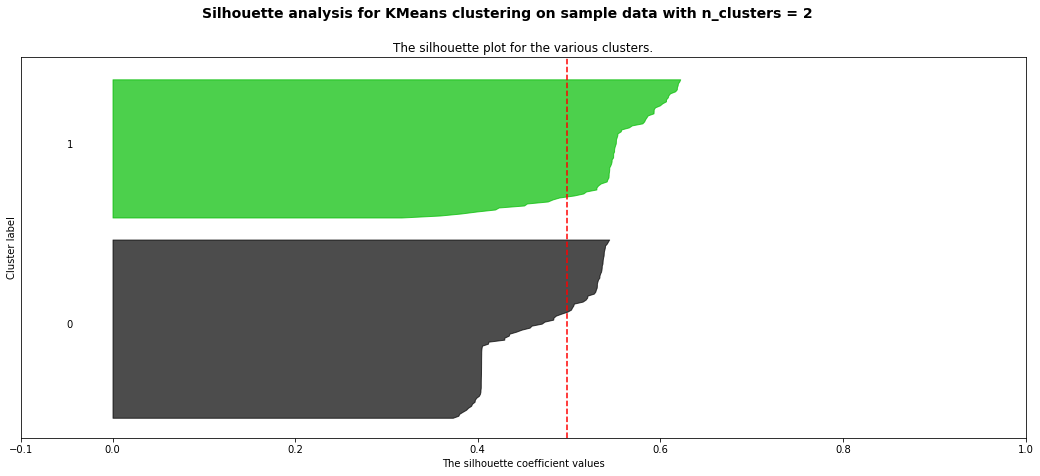

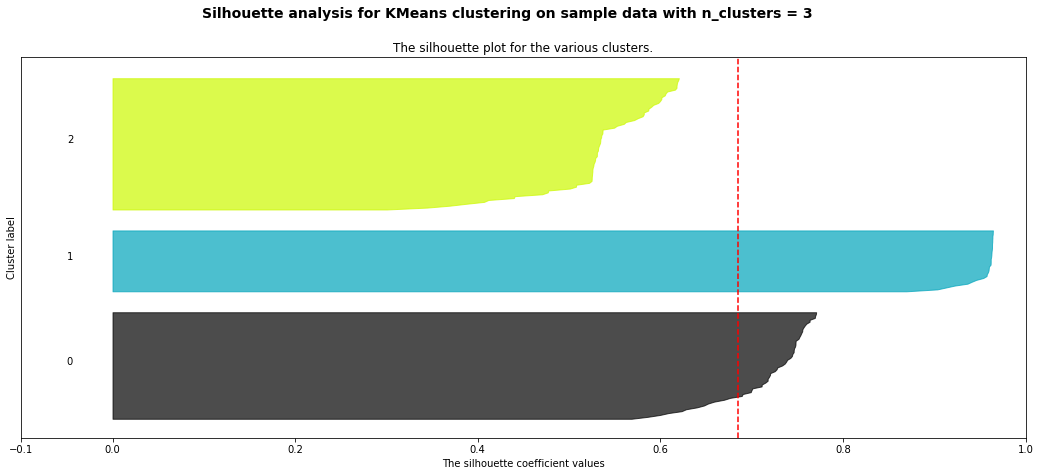

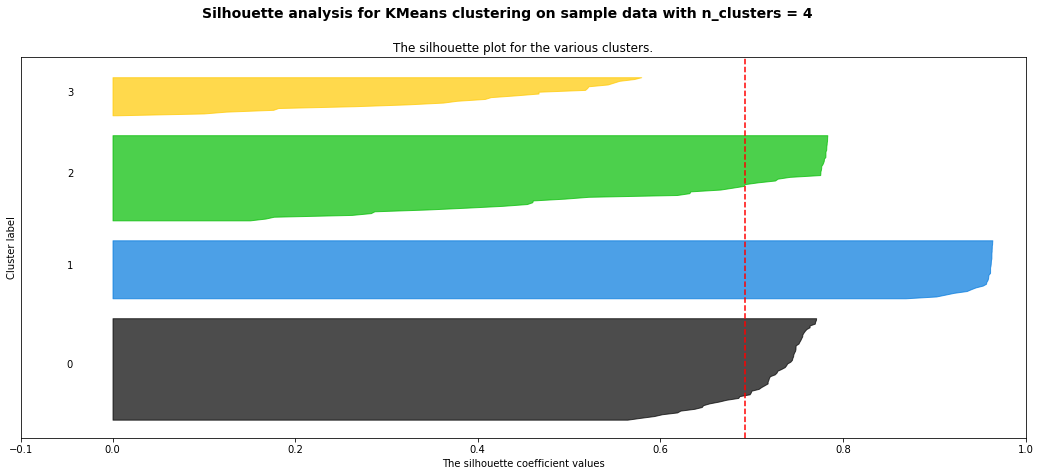

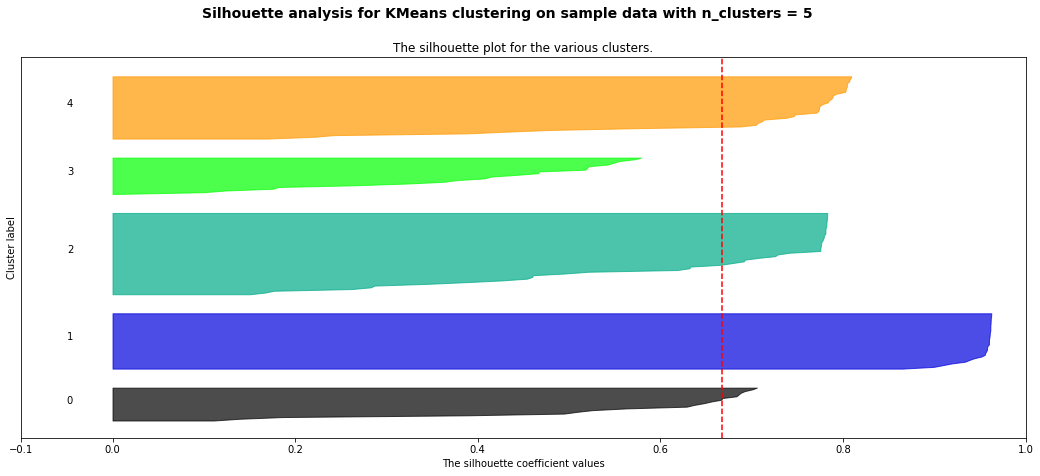

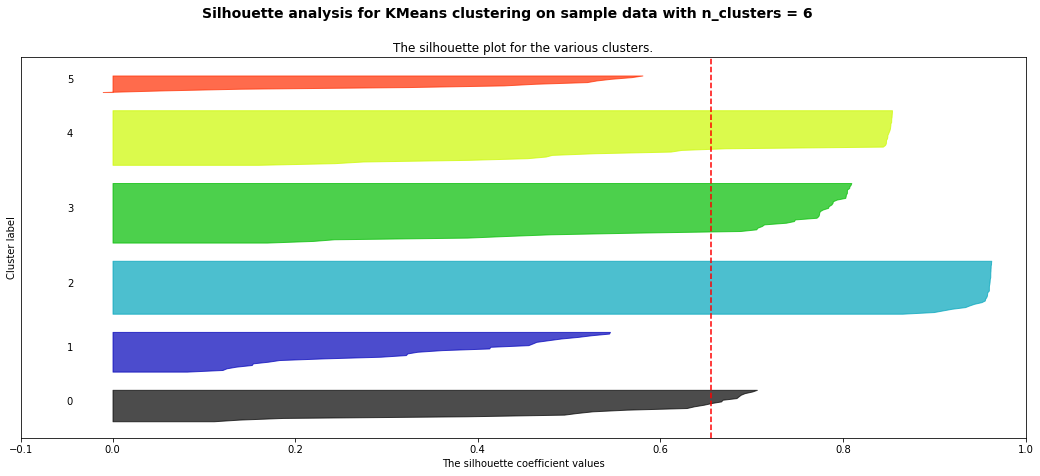

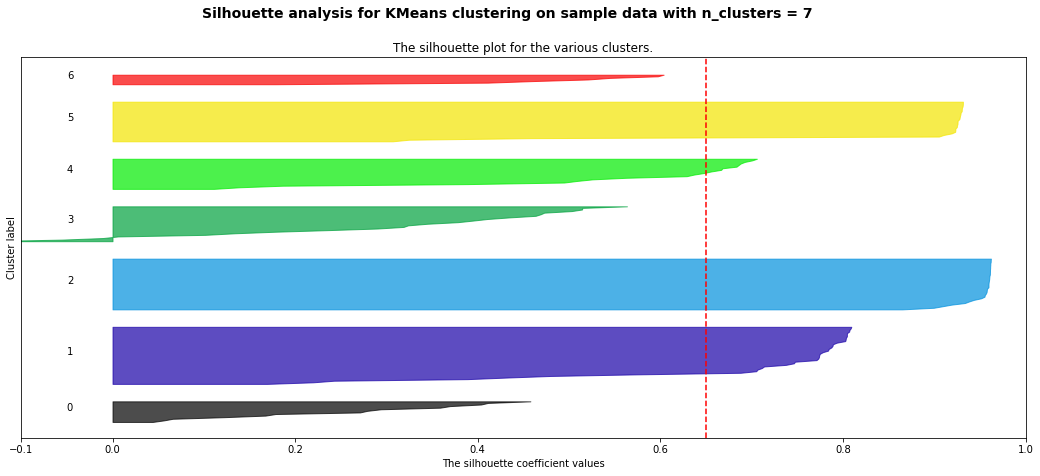

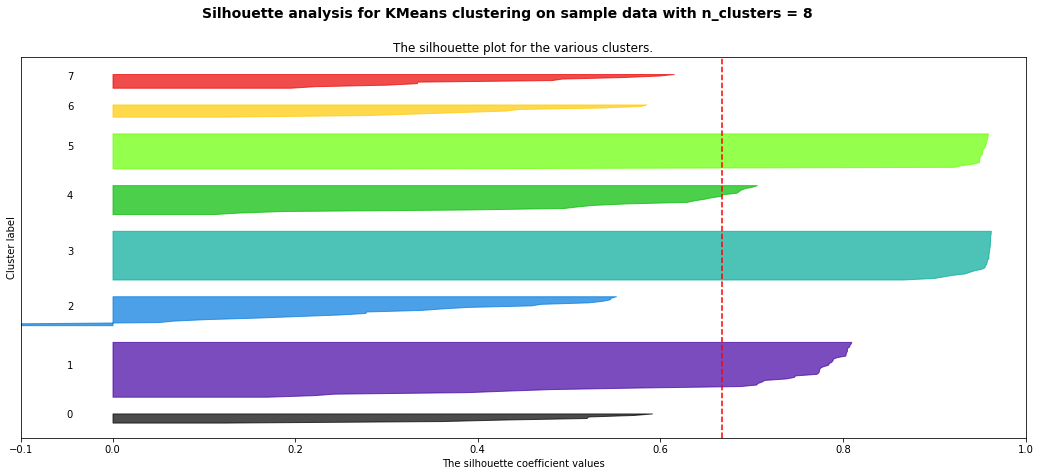

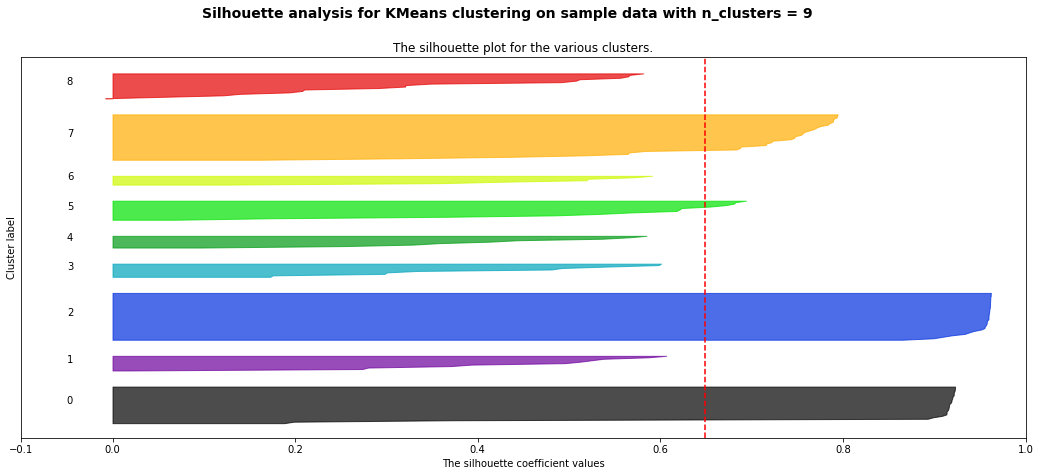

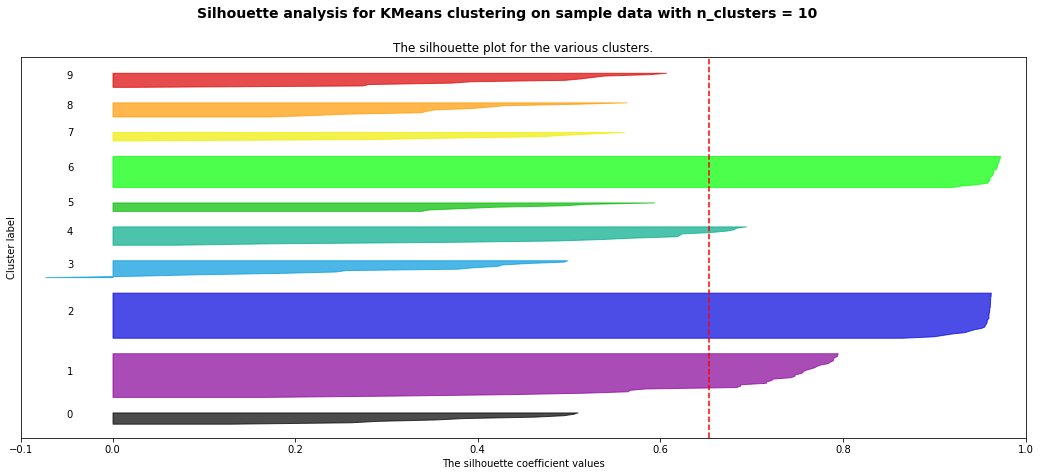

In [103]:


range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots()
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(temp_mgc2) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(temp_mgc2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(temp_mgc2, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(temp_mgc2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


In [104]:
kmeans_test = KMeans(n_clusters=4)
kmeans_test.fit(temp_mgc2)
temp_mgc["labels"] = kmeans_test.labels_

In [105]:
temp_india = temp_mgc[temp_mgc["country_india"] == 1.0]
temp_italy = temp_mgc[temp_mgc["country_italy"] == 1.0]
temp_south_korea = temp_mgc[temp_mgc["country_south_korea"] == 1.0]
temp_united_kingdom = temp_mgc[temp_mgc["country_united_kingdom"] == 1.0]
temp_usa = temp_mgc[temp_mgc["country_usa"] == 1.0]

temp_states = {
"india":temp_india,
"italy":temp_italy,
"south_korea":temp_south_korea,
"united_kingdom":temp_united_kingdom,
"usa":temp_usa
}

In [106]:
len(temp_india[temp_india["labels"] == 3])

0

In [107]:
import matplotlib.dates as mdates

def cluster_kmeans2(state):
    '''
    if(state[state["country_india"] == 1.0]): title = "India"
    elif(state[state["country_italy"] == 1.0]): title = "Italy"
    elif(state[state["country_south_korea"] == 1.0]): title = "SK"
    elif(state[state["country_united_kingdom"] == 1.0]): title = "Uk"
    elif(state[state["country_usa"] == 1.0]): title = "Usa"
    '''
    state = temp_states[state]
    plt.plot(state.index, state.daily_test_pc, 'blue')
    plt.plot(state.index, state.daily_cases_pc, 'yellow')
    plt.plot(state.index, state.daily_dead_pc, 'purple')
    #plt.plot(state.index, state.lethality, 'gray')
    
    plt.legend(["Daily Test", "Daily Cases", "Daily Dead"], loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
    
    
    temp1 = state[state["labels"] == 0]
    temp2 = state[state["labels"] == 1]
    temp3 = state[state["labels"] == 2]
    temp4 = state[state["labels"] == 3]
    temp5 = state[state["labels"] == 4]
    temp6 = state[state["labels"] == 5]
    temp7 = state[state["labels"] == 6]
    temp8 = state[state["labels"] == 7]
    
    try:
        min1 = temp1.index.values.min()
        max1 = temp1.index.values.max() 
        plt.axvspan(min1, max1, facecolor='gray', alpha=0.5)
    except:
        print("")
    
    try:
        min2 = temp2.index.values.min()
        max2 = temp2.index.values.max()
        plt.axvspan(min2, max2, facecolor='blue', alpha=0.5)
    except:
        print("")
    
    try:
        min3 = temp3.index.values.min()
        max3 = temp3.index.values.max()
        plt.axvspan(min3, max3, facecolor='green', alpha=0.5)
    except:
        print("")
    
    try:
        min4 = temp4.index.values.min()
        max4 = temp4.index.values.max()
        plt.axvspan(min4, max4, facecolor='black', alpha=0.5)
    except:
        print("")
    
    try:
        min5 = temp5.index.values.min()
        max5 = temp5.index.values.max()
        plt.axvspan(min5, max5, facecolor='red', alpha=0.5)
    except:
        print("")

    try:
        min6 = temp6.index.values.min()
        max6 = temp6.index.values.max()
        plt.axvspan(min6, max6, facecolor='yellow', alpha=0.5)
    except:
        print("")
        
    try:
        min7 = temp7.index.values.min()
        max7 = temp7.index.values.max()
        plt.axvspan(min7, max7, facecolor='purple', alpha=0.5)
    except:
        print("")

    try:
        min8 = temp8.index.values.min()
        max8 = temp8.index.values.max()
        plt.axvspan(min8, max8, facecolor='brown', alpha=0.5)
    except:
        print("")
        
    plt.xlabel('Date')
    plt.ylabel('Values')
    #plt.title(title)
    plt.show()

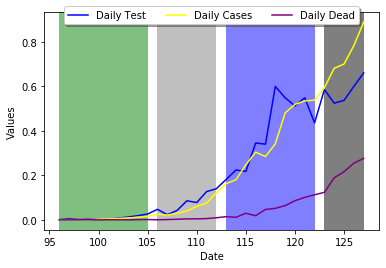

In [108]:
cluster_kmeans2("usa")

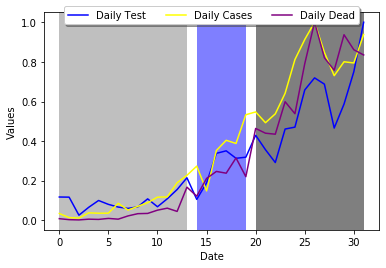

In [109]:
cluster_kmeans2("italy")

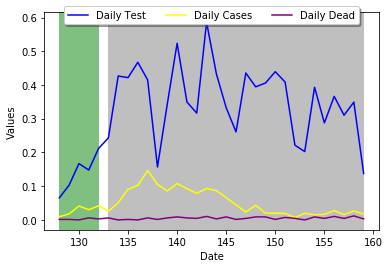

In [110]:
cluster_kmeans2("south_korea")

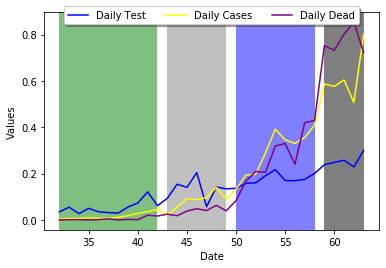

In [111]:
cluster_kmeans2("united_kingdom")

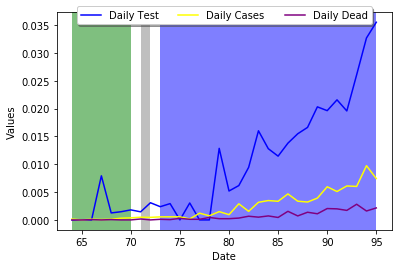

In [112]:
cluster_kmeans2("india")

## Conclusion - Second fit

We have chosen n=4, the results show us which phase each country gone through and for how many times that phase lasted.

## Second clustering
<p> Since the first clustering results was something not expected and also something that wasn't in our goal we needed something to be able to return in our scope.
We decided to don't waste all the work done in the first part but make some other analisys and finally put all togheter to find one answer.</p>

<p>So we decided to focus our second clustering for defining countries related trait.
For this study we used a dataset containing:
<ul>
    <li>democracy_score</li>
    <li>GPD_pc</li>
    <li>median_age</li>
    <li>continent</li>
    <li>political_spectrum</li>
</ul>
</p>

In [113]:
info

,democracy_score,GPD_pc,median_age,continent_america,continent_asia,continent_europe,political_spectrum_centre-left,political_spectrum_centre-right
country,,,,,,,,
italy,7.52,31586.67,45.5,0,0,1,1,0
india,6.90,1970.09,28.1,0,1,0,0,1
south_korea,8.00,34465.79,41.8,0,1,0,1,0
united_kingdom,8.52,42060.17,40.5,0,0,1,0,1
usa,7.96,62067.00,38.1,1,0,0,0,1


In [114]:
inertia = []

list_k = list(range(1,5))

for k in list_k:
    kmeans_test = KMeans(n_clusters=k)
    kmeans_test.fit(info)
    inertia.append(kmeans_test.inertia_)

In [115]:
%%capture out

plt.figure(figsize=(6, 6))
plt.plot(list_k, inertia, '-o')
plt.xlabel(r'Number of clusters k')
plt.ylabel('Sum of squared distance')

### Performance study

#### Elbow

Text(0, 0.5, 'Sum of squared distance')

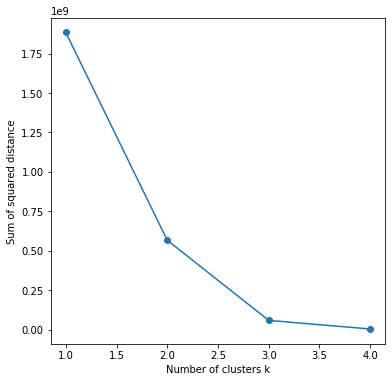

In [116]:
out.show()

#### Silhouette

In [117]:
range_n_clusters = [2, 3, 4]
print(sil_score(info, range_n_clusters))

For n_clusters = 2 The average silhouette_score is : 0.47327990215830695
For n_clusters = 3 The average silhouette_score is : 0.4266606664470579
For n_clusters = 4 The average silhouette_score is : 0.2691983630554049
None


For n_clusters = 2 The average silhouette_score is : 0.47327990215830695


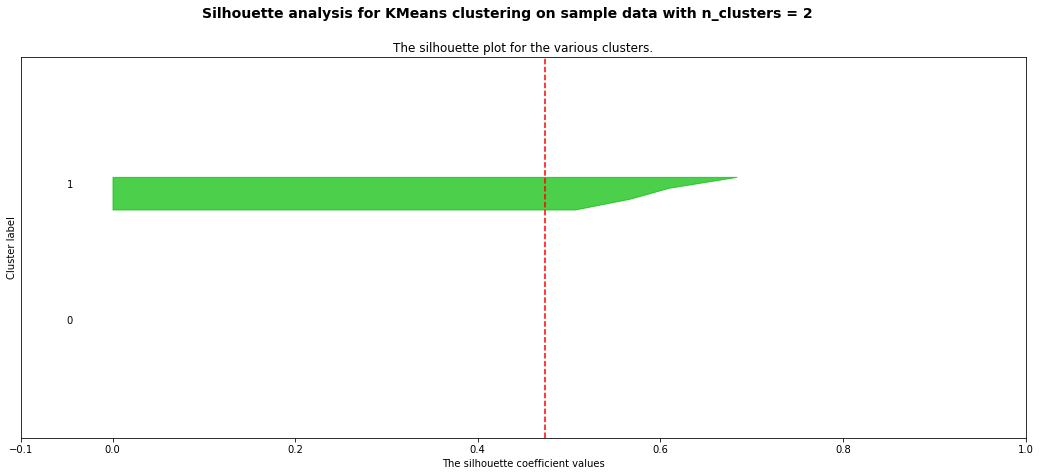

In [118]:
plot_sil(2, info)

For n_clusters = 3 The average silhouette_score is : 0.4266606664470579


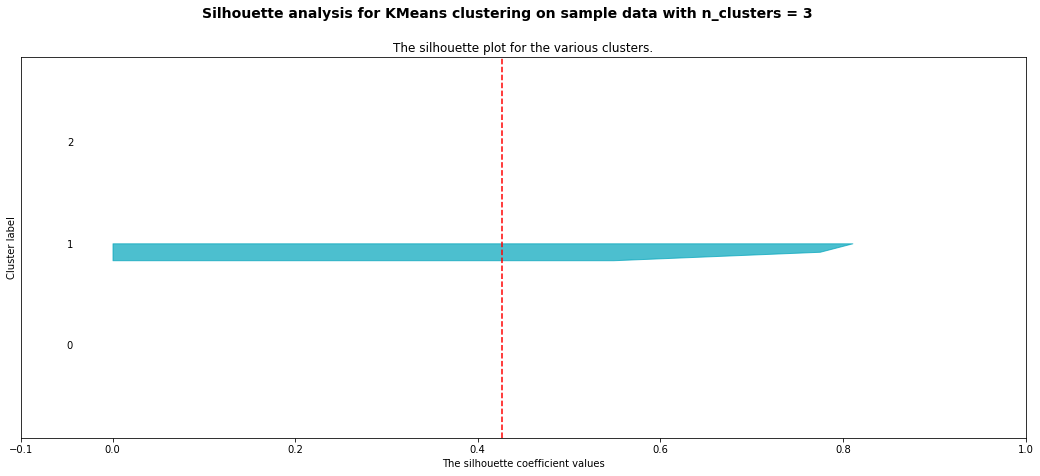

In [119]:
plot_sil(3, info)

For n_clusters = 2 The average silhouette_score is : 0.47327990215830695
For n_clusters = 3 The average silhouette_score is : 0.4266606664470579
For n_clusters = 4 The average silhouette_score is : 0.2691983630554049


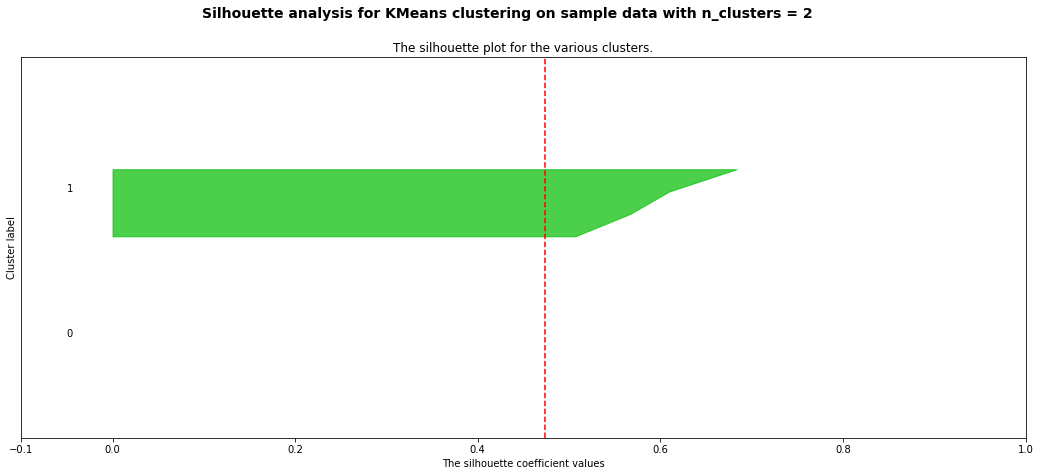

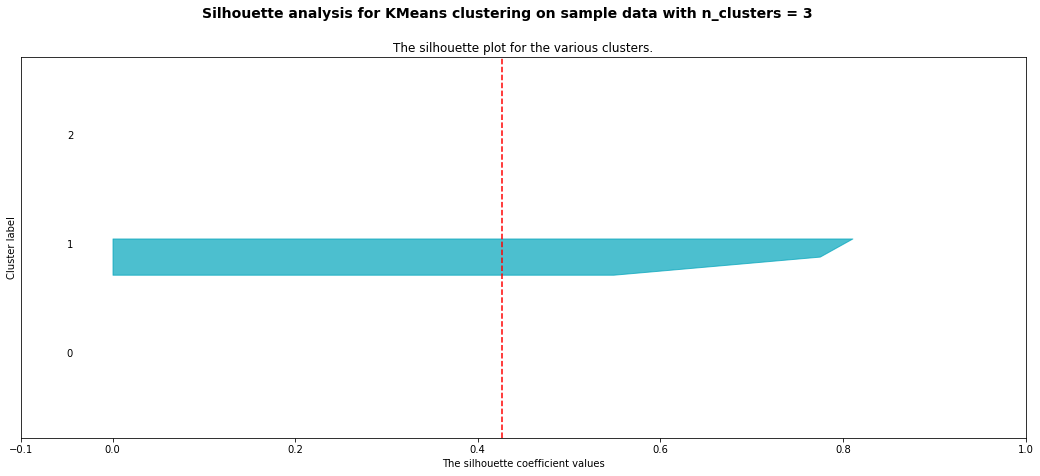

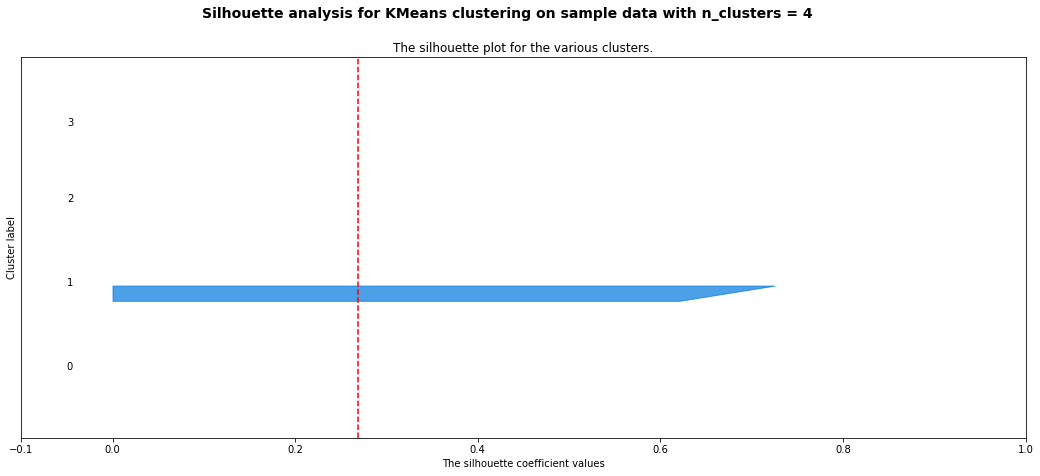

In [120]:
range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots()
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(info) + (n_clusters + 1) * 4])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=4)
    cluster_labels = clusterer.fit_predict(info)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(info, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(info, cluster_labels)

    y_lower = 4
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 4  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [121]:
kmeans_country = KMeans(n_clusters=3)
kmeans_country.fit(info)
info["country_cluster"] = kmeans_country.labels_

In [122]:
info

,democracy_score,GPD_pc,median_age,continent_america,continent_asia,continent_europe,political_spectrum_centre-left,political_spectrum_centre-right,country_cluster
country,,,,,,,,,
italy,7.52,31586.67,45.5,0,0,1,1,0,1
india,6.90,1970.09,28.1,0,1,0,0,1,0
south_korea,8.00,34465.79,41.8,0,1,0,1,0,1
united_kingdom,8.52,42060.17,40.5,0,0,1,0,1,1
usa,7.96,62067.00,38.1,1,0,0,0,1,2


### Conclusion
<p> The score found easily lead us to well define our cluster, despite silhouette was better for 2 cluster , Elbow was largely more statisfing for 3 and also looking in the final results of clusterization having 3 clusters define better some trait of countries</p>

## Last cluster 
<p>Now we have two clusterization, one that describe pandemic phase for country and one that describe the country trait.</p>

<p>Having this information we decided to use the first cluster to count how many days a country was in each phase, then put this information togheter with country trait clusterizion result and got this dataset:</p>
<ul>
    <li>country</li>
    <li>country_label</li>
    <li>day_phase0</li>
    <li>day_phase1</li>
    <li>day_phase2</li>
    <li>day_phase3</li>
</ul>

<p> So we proceed with cluster this dataset hoping to find a "country behavior", merging its trait with ist pandemic phase description.</p>

In [123]:
last_final_ultimate_mgc = pd.DataFrame()
last_final_ultimate_mgc_info = pd.DataFrame()
#columns=["day_phase0","day_phase1","day_phase2","day_phase3","country_label"]
for state in temp_states:
    datarow = {"country_label": int(info[info.index == state].country_cluster.values), "country":state}
    state = temp_states[state]
    for i in range(0,4):
        datarow["day_phase"+str(i)] = len(state[state["labels"] == i])
    last_final_ultimate_mgc_info = last_final_ultimate_mgc_info.append(datarow,ignore_index=True)

last_final_ultimate_mgc = last_final_ultimate_mgc_info.drop("country",axis=1)

In [124]:
last_final_ultimate_mgc_info

,country,country_label,day_phase0,day_phase1,day_phase2,day_phase3
0,india,0.0,2.0,23.0,7.0,0.0
1,italy,1.0,14.0,6.0,0.0,12.0
2,south_korea,1.0,27.0,0.0,5.0,0.0
3,united_kingdom,1.0,7.0,9.0,11.0,5.0
4,usa,2.0,7.0,10.0,10.0,5.0


In [125]:
inertia = []

list_k = list(range(1,5))

for k in list_k:
    kmeans_test = KMeans(n_clusters=k)
    kmeans_test.fit(last_final_ultimate_mgc)
    inertia.append(kmeans_test.inertia_)

In [126]:
%%capture out

plt.figure(figsize=(6, 6))
plt.plot(list_k, inertia, '-o')
plt.xlabel(r'Number of clusters k')
plt.ylabel('Sum of squared distance')

### Performance study

#### Elbow

Text(0, 0.5, 'Sum of squared distance')

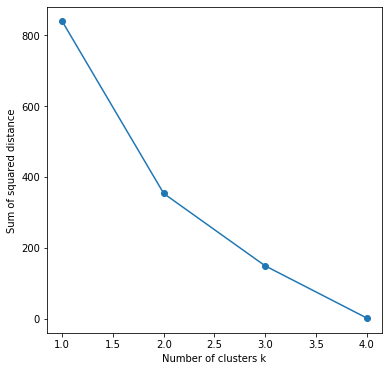

In [127]:
out.show()

#### Silhouette

In [128]:
range_n_clusters = [2, 3, 4]
print(sil_score(last_final_ultimate_mgc, range_n_clusters))

For n_clusters = 2 The average silhouette_score is : 0.35635712645550566
For n_clusters = 3 The average silhouette_score is : 0.23467471966464565
For n_clusters = 4 The average silhouette_score is : 0.3534334496841991
None


For n_clusters = 3 The average silhouette_score is : 0.23467471966464565


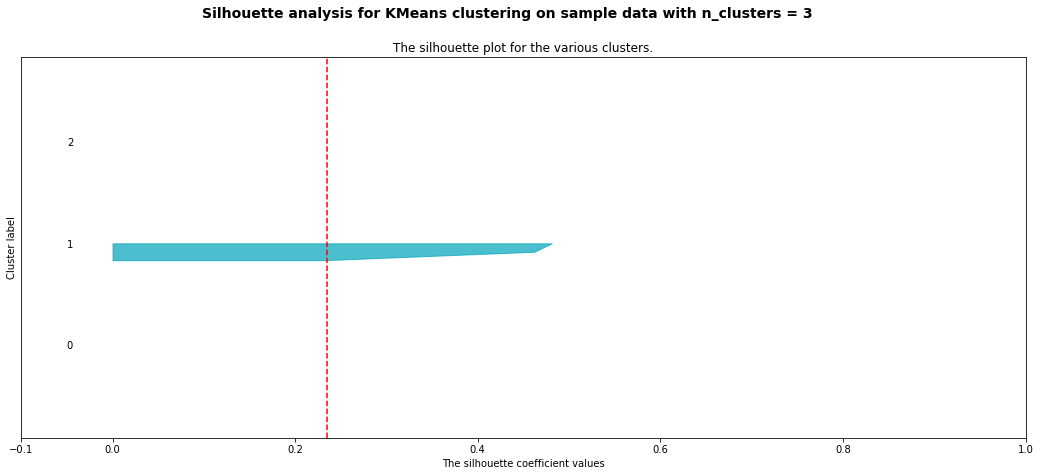

In [129]:
plot_sil(3, last_final_ultimate_mgc)

For n_clusters = 4 The average silhouette_score is : 0.3534334496841991


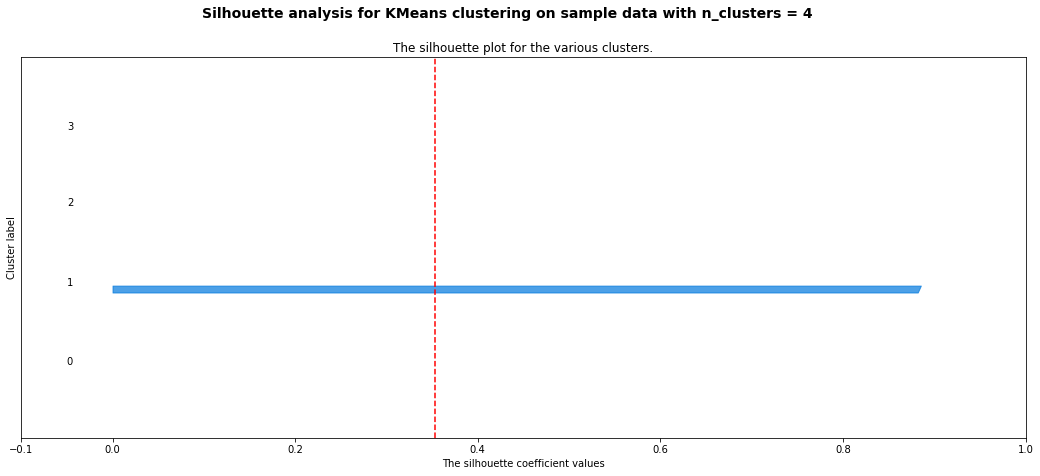

In [130]:
plot_sil(4, last_final_ultimate_mgc)

For n_clusters = 2 The average silhouette_score is : 0.35635712645550566
For n_clusters = 3 The average silhouette_score is : 0.23467471966464565
For n_clusters = 4 The average silhouette_score is : 0.3534334496841991


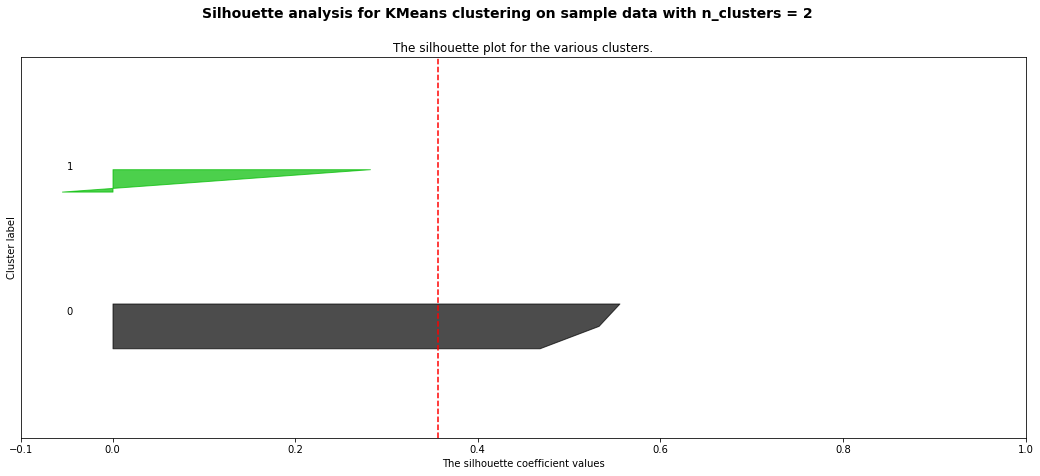

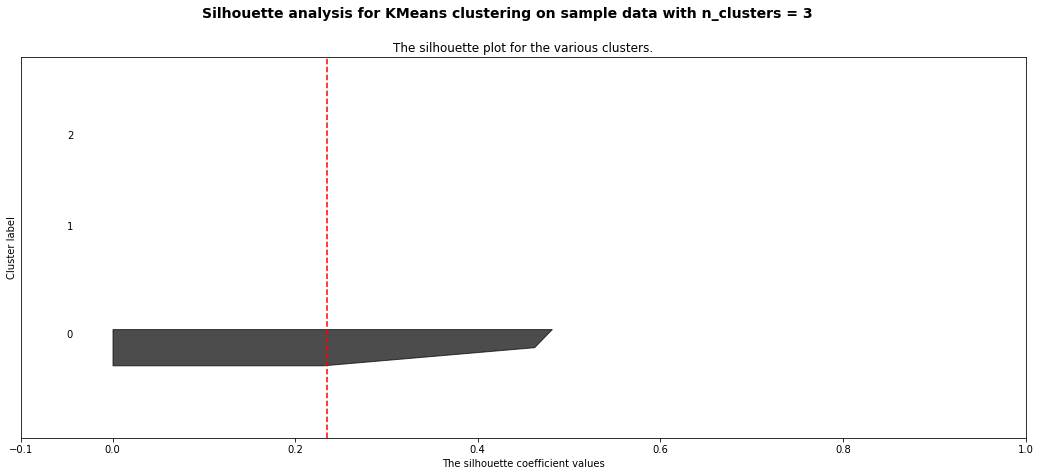

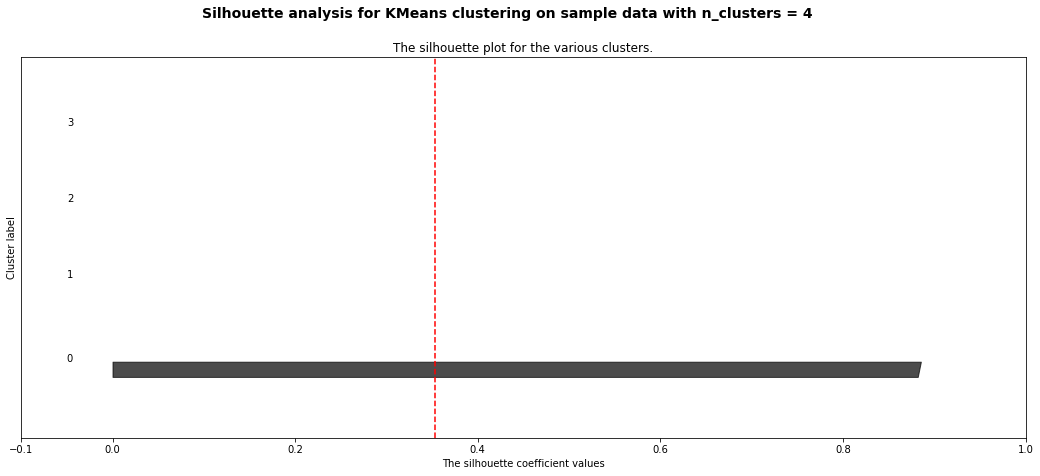

In [131]:
range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots()
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(last_final_ultimate_mgc) + (n_clusters + 1) * 4])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=4)
    cluster_labels = clusterer.fit_predict(last_final_ultimate_mgc)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(last_final_ultimate_mgc, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(last_final_ultimate_mgc, cluster_labels)

    y_lower = 4
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 4  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [132]:
kmeans_country = KMeans(n_clusters=3)
kmeans_country.fit(last_final_ultimate_mgc)
last_final_ultimate_mgc_info["country_behavior"] = kmeans_country.labels_

In [133]:
last_final_ultimate_mgc_info

,country,country_label,day_phase0,day_phase1,day_phase2,day_phase3,country_behavior
0,india,0.0,2.0,23.0,7.0,0.0,2
1,italy,1.0,14.0,6.0,0.0,12.0,0
2,south_korea,1.0,27.0,0.0,5.0,0.0,1
3,united_kingdom,1.0,7.0,9.0,11.0,5.0,0
4,usa,2.0,7.0,10.0,10.0,5.0,0


### Conclusion

<p>We found a label that taking into consideration our phase and country featue define how a country have addressed the pandemic </p>

# Prediction

<p>Now that we have defined the behavior lets predict the cases on our newbie country.</p>

<p>Our prediciton is based on three factor:
<ul>
    <li>Clustering is made on first 30 days after day zero</li>
    <li>We have data about country for at least 50 days after day zero</li>
    <li>We have a label grouping countries</li>
</ul>
</p>

<p>
    So we can made prediction when a new country start the pandemic infection and we have data about the first 30 days after day zero of this country.
    Using this data we can get our label about country behavior and then we can use the data of other countries having the same label to estimate the number of cases.
</p>

In [134]:
states_same_label = ["italy","united_kingdom","usa"]
    
mgc_max_days_final = mgc_max_days_final.loc[mgc_max_days_final['country'].isin(states_same_label)]
mgc_max_days_final = mgc_max_days_final.reset_index()
mgc_max_days_final = mgc_max_days_final.drop("date", axis = 1)
mgc_max_days_final
temp_mgc_max_days_final = mgc_max_days_final.sort_values(by=['delta_day_zero'])

In [135]:
max_days

59

In [136]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

def model_fit(x_train, y_train):
    
    model = linear_model.LinearRegression().fit(x_train, y_train)

    LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
    
    return model

In [137]:
'''
temp = temp_mgc_max_days_final.loc[:, ['daily_cases_pc', 'delta_day_zero']]
temp['daily_cases_pc'] = temp['daily_cases_pc'] * 1000000
temp = temp.groupby("delta_day_zero").mean()
temp

# Data to predict
y_f = temp.loc[:, 'daily_cases_pc']
y_f = pd.DataFrame(y_f)

# Using just features
x_f = temp.index
x_f = pd.DataFrame(x_f)

# Using two features
x_f_d = temp_mgc_max_days_final.loc[:, ['delta_day_zero','daily_test_pc']]
x_f_d = pd.DataFrame(x_f_d)

y_f_d = temp_mgc_max_days_final.loc[:, 'daily_cases_pc']
y_f_d = y_f_d * 1000000
y_f_d = pd.DataFrame(y_f_d)
'''

'\ntemp = temp_mgc_max_days_final.loc[:, [\'daily_cases_pc\', \'delta_day_zero\']]\ntemp[\'daily_cases_pc\'] = temp[\'daily_cases_pc\'] * 1000000\ntemp = temp.groupby("delta_day_zero").mean()\ntemp\n\n# Data to predict\ny_f = temp.loc[:, \'daily_cases_pc\']\ny_f = pd.DataFrame(y_f)\n\n# Using just features\nx_f = temp.index\nx_f = pd.DataFrame(x_f)\n\n# Using two features\nx_f_d = temp_mgc_max_days_final.loc[:, [\'delta_day_zero\',\'daily_test_pc\']]\nx_f_d = pd.DataFrame(x_f_d)\n\ny_f_d = temp_mgc_max_days_final.loc[:, \'daily_cases_pc\']\ny_f_d = y_f_d * 1000000\ny_f_d = pd.DataFrame(y_f_d)\n'

In [138]:
# Data to predict
y_f = temp_mgc_max_days_final.loc[:, 'daily_cases_pc']
y_f = y_f * 1000000
y_f = pd.DataFrame(y_f)

# Using one features
x_f = temp_mgc_max_days_final.loc[:, ['delta_day_zero']]
x_f = pd.DataFrame(x_f)

## Linear regression

<p>
In order to estimate the cases we try to make a linear regression of cases of country belonging to the same label.
</p>

In [139]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_f, y_f, test_size= 0.3, random_state = 7, shuffle = False)
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(x_f, y_f, test_size= 0.3, random_state = 7)

In [140]:
model = model_fit(x_train, y_train)
score = model.score(x_train, y_train)

model_s = model_fit(x_train_s, y_train_s)
score_s = model_s.score(x_train_s, y_train_s)

In [141]:
# Defining an useful function to plot 
# linear regression function and actual value
def drawLine(model, X_test, y_test, title, R2, x_train, y_train):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X_test, y_test, c='g', marker='o')
    ax.scatter(x_train, y_train, c='b', marker='o')
    ax.plot(X_test, model.predict(X_test), color='orange', linewidth=1, alpha=0.7)
    ax.plot(x_train, model.predict(x_train), color='red', linewidth=1, alpha=0.7)

    title += " R2: " + str(R2)
    ax.set_title(title)
    print(title)
    print("Intercept(s): ", model.intercept_)

Cases(Test) R2: 0.8074468100963834
Intercept(s):  [-12.28285788]


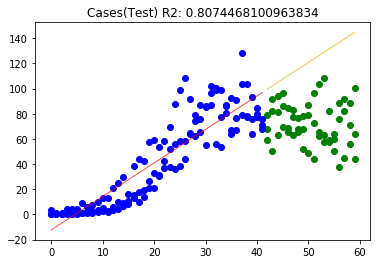

In [142]:
drawLine(model, x_test, y_test, "Cases(Test)", score, x_train, y_train)

Cases(Test) R2: 0.6367674451513619
Intercept(s):  [4.19999681]


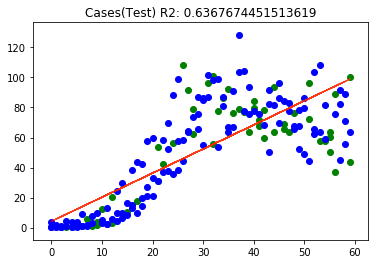

In [143]:
drawLine(model_s, x_test_s, y_test_s, "Cases(Test)", score_s, x_train_s, y_train_s)

### Conclusion

<p>Using a first degree line put us to the right road, but the funcion is too simple to fit data consistently.<p>

In [144]:

from sklearn.metrics import mean_squared_error, r2_score

# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 

def polyRegression(x_train, x_test, y_train, y_test, d, shuffle = False):

    poly_features = PolynomialFeatures(degree=d)
    X_train_poly = poly_features.fit_transform(x_train)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    score = poly_model.score(X_train_poly, y_train)

    if(shuffle):
        # predicting on test data-set
        x_test = pd.concat([x_test, y_test], axis=1, join='inner')
        x_test = x_test.sort_values(by=['delta_day_zero'])
        y_test = x_test["daily_cases_pc"]
        x_test = x_test.drop("daily_cases_pc", axis = 1)
        
    y_train_predict = poly_model.predict(poly_features.fit_transform(x_train))
    y_test_predict = poly_model.predict(poly_features.fit_transform(x_test))

    # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
    r2_test = r2_score(y_test, y_test_predict)

    print("The model performance for the test set")
    print("-------------------------------------------")
    print("RMSE of test set is {}".format(rmse_test))
    print("R2 score of test set is {}".format(r2_test))
    
    return poly_model, poly_features, y_test_predict, score, x_test, y_test, y_train_predict


## Polynomial Regression

<p>Since the simple linear regression isn't enought we tried adding some degree to our line, in this way the funcion cuold fit better the data given as input<p>

The model performance for the test set
-------------------------------------------
RMSE of test set is 14.622027952977229
R2 score of test set is 0.7945353556110805


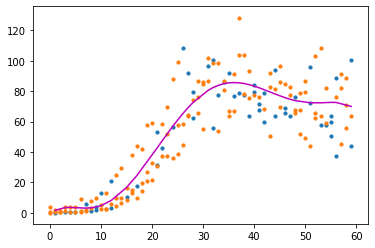

In [145]:
x_train, x_test, y_train, y_test = train_test_split(x_f, y_f, test_size= 0.3, random_state = 7)
poly_model, poly_features, y_test_predict, score, X_test, Y_test, y_train_predict = polyRegression(x_train, x_test, y_train, y_test, 6, shuffle = True)

plt.scatter(X_test, Y_test, s=10)
plt.scatter(x_train, y_train, s=10)
plt.plot(X_test, y_test_predict, color='m')
plt.show()

The model performance for the test set
-------------------------------------------
RMSE of test set is 23.726379605595053
R2 score of test set is -0.5131319144602704


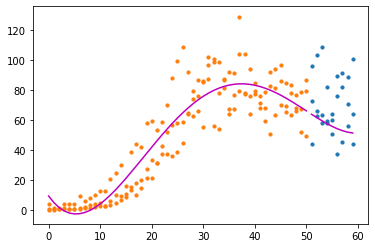

In [146]:
x_train, x_test, y_train, y_test = train_test_split(x_f, y_f, test_size= 0.15, random_state = 7, shuffle = False)
poly_model, poly_features, y_test_predict, score, X_test, Y_test, y_train_predict = polyRegression(x_train, x_test, y_train, y_test, 4)

plt.scatter(X_test, Y_test, s=10)
plt.scatter(x_train, y_train, s=10)
plt.plot(X_test, y_test_predict, color='m')
plt.plot(x_train, y_train_predict, color='m')
plt.show()

In [147]:
X_temp = np.array([x_f["delta_day_zero"].values])
y_temp = np.array([y_f["daily_cases_pc"]])
X_temp = X_temp[0,:]
y_temp = y_temp[0,:]
X_temp

array([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,
        5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10, 11,
       11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16,
       17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22,
       22, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 26, 27, 27, 27, 28,
       28, 28, 29, 29, 29, 30, 30, 30, 31, 31, 31, 32, 32, 32, 33, 33, 33,
       34, 34, 34, 35, 35, 35, 36, 36, 36, 37, 37, 37, 38, 38, 38, 39, 39,
       39, 40, 40, 40, 41, 41, 41, 42, 42, 42, 43, 43, 43, 44, 44, 44, 45,
       45, 45, 46, 46, 46, 47, 47, 47, 48, 48, 48, 49, 49, 49, 50, 50, 50,
       51, 51, 51, 52, 52, 52, 53, 53, 53, 54, 54, 54, 55, 55, 55, 56, 56,
       56, 57, 57, 57, 58, 58, 58, 59, 59, 59])

In [148]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=5, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(10), 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]}

tscv = TimeSeriesSplit(n_splits=4)
poly_grid = GridSearchCV(PolynomialRegression(), param_grid, cv=tscv, scoring='neg_mean_squared_error')

poly_features = PolynomialFeatures(degree=5)
X_train_poly = poly_features.fit_transform(x_f)

poly_grid.fit(X_train_poly, y_f)


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=4),
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=5)),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__normalize': [True, False],
                         'polynomialfeatures__degree': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='neg_mean_squared_error')

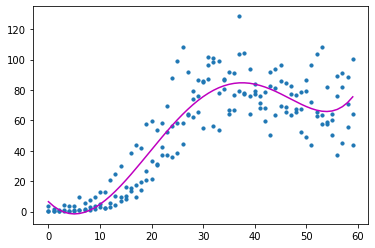

In [149]:
plt.scatter(x_f, y_f, s=10)
plt.plot(x_f, poly_grid.predict(X_train_poly), color='m')
plt.show()

In [150]:
    rmse_test = np.sqrt(mean_squared_error(y_f, poly_grid.predict(X_train_poly)))
    r2_test = r2_score(y_f, poly_grid.predict(X_train_poly))

    print("The model performance for the test set")
    print("-------------------------------------------")
    print("RMSE of test set is {}".format(rmse_test))
    print("R2 score of test set is {}".format(r2_test))
    

The model performance for the test set
-------------------------------------------
RMSE of test set is 14.291806877079845
R2 score of test set is 0.8248014443214918


## Conclusion

<p>
We were able to find a regression curve, R0 score is good but not perfect, RMSE is a little high.
In the end we are satisfied with the results, probably it could have been better if we had found more countries to add into our study.
</p>

## Further experiments
<p>
Arima
</p>

In [151]:
from pylab import rcParams
import statsmodels.api as sm

In [152]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,8), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

In [153]:
arima_dataset

date
2020-02-24     229
2020-02-25      93
2020-02-26      78
2020-02-27     250
2020-02-28     238
2020-02-29     240
2020-03-01     566
2020-03-02     342
2020-03-03     466
2020-03-04     587
2020-03-05     769
2020-03-06     778
2020-03-07    1247
2020-03-08    1492
2020-03-09    1797
2020-03-10     977
2020-03-11    2313
2020-03-12    2651
2020-03-13    2547
2020-03-14    3497
2020-03-15    3590
2020-03-16    3233
2020-03-17    3526
2020-03-18    4207
2020-03-19    5322
2020-03-20    5986
2020-03-21    6557
2020-03-22    5560
2020-03-23    4789
2020-03-24    5249
2020-03-25    5210
2020-03-26    6153
2020-03-27    5959
2020-03-28    5974
2020-03-29    5217
2020-03-30    4050
2020-03-31    4053
2020-04-01    4782
2020-04-02    4668
2020-04-03    4585
2020-04-04    4805
2020-04-05    4316
2020-04-06    3599
2020-04-07    3039
2020-04-08    3836
2020-04-09    4204
2020-04-10    3951
2020-04-11    4694
2020-04-12    4092
2020-04-13    3153
2020-04-14    2972
2020-04-15    2667
2020-04

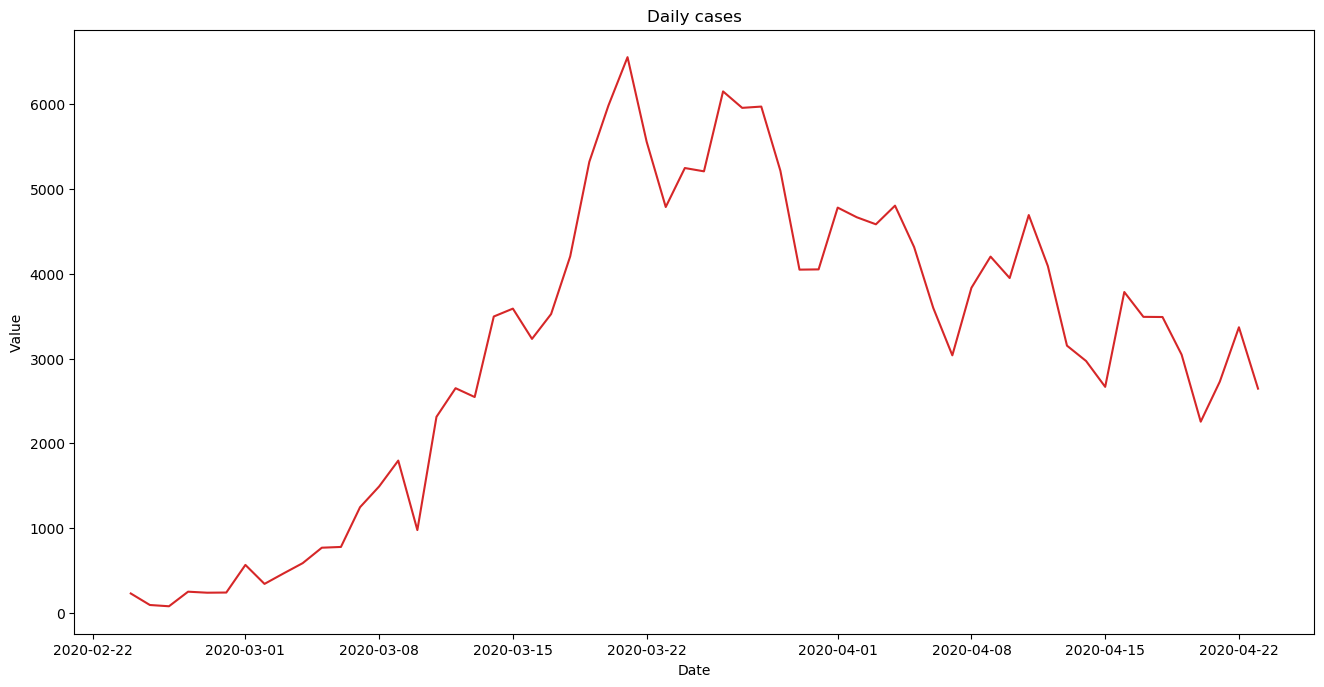

In [154]:
plot_df(arima_dataset, x=arima_dataset.index, y=arima_dataset, title='Daily cases')

In [155]:
def limit(data, frm, to):
    return data[(data.index>=frm)&(data.index<to)]

In [156]:
t = arima_dataset.copy()
t = t.drop(t.index[t.index.duplicated()])
freq_index = pd.date_range(start=t.index[0], end=t.index[-1], freq='D')
constructed = pd.Series(index=freq_index, name='Daily Cases')

constructed.update(t)

constructed.interpolate(inplace=True)

train = limit(constructed, '2020-02-22', '2020-04-01')
test  = limit(constructed, '2020-04-02', '2020-04-22')

In [157]:
from pmdarima.arima import auto_arima

stepwise_model = auto_arima(arima_dataset, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,7) [intercept=True]; AIC=809.302, BIC=819.058, Time=1.161 seconds
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=True]; AIC=820.977, BIC=824.879, Time=0.029 seconds
Fit ARIMA(1,1,0)x(1,1,0,7) [intercept=True]; AIC=817.229, BIC=825.034, Time=0.261 seconds
Fit ARIMA(0,1,1)x(0,1,1,7) [intercept=True]; AIC=807.329, BIC=815.134, Time=0.381 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=False]; AIC=819.054, BIC=821.005, Time=0.028 seconds
Fit ARIMA(1,1,1)x(0,1,0,7) [intercept=True]; AIC=819.264, BIC=827.069, Time=0.168 seconds
Fit ARIMA(1,1,1)x(1,1,1,7) [intercept=True]; AIC=810.228, BIC=821.936, Time=0.915 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(

In [158]:
stepwise_model.fit(train)

ARIMA(order=(0, 1, 0), seasonal_order=(0, 1, 1, 7), suppress_warnings=True)

In [159]:
future_forecast = stepwise_model.predict(n_periods=20)

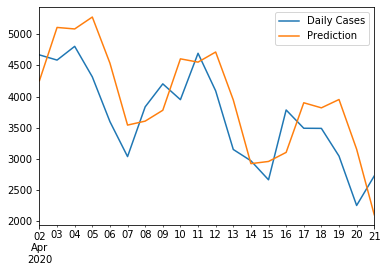

In [160]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot()

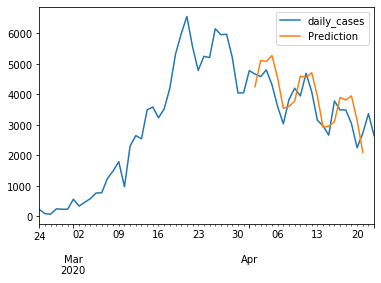

In [161]:
pd.concat([arima_dataset,future_forecast],axis=1).plot()